In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import datetime
import sqlite3 as sl

# 0. Предисловие

# 1. Подготовка и изучение данных

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df['created'] = df['created'].str[:19]
df['created'] = df['created'].str.replace('T', ' ')
df['created'] = pd.to_datetime(df.created, format ='%Y-%m-%d %H:%M:%S')

df['date_of_finish_cooking'] = df['date_of_finish_cooking'].str[:19]
df['date_of_finish_cooking'] = df['date_of_finish_cooking'].str.replace('T', ' ')
df['date_of_finish_cooking'] = pd.to_datetime(df.date_of_finish_cooking, format ='%Y-%m-%d %H:%M:%S')

df['date_of_visit'] = df['date_of_visit'].str[:19]
df['date_of_visit'] = df['date_of_visit'].str.replace('T', ' ')
df['date_of_visit'] = pd.to_datetime(df.date_of_visit, format ='%Y-%m-%d %H:%M:%S')

df['период_заказа'] = df['created'].dt.strftime('%Y-%m')

In [4]:
df.head()

,id,price,full_price,final_price,agent_amount,agent_percent,application_id,client_id,created,delivery_type,...,is_service_delivery,latitude,longitude,make_fast_as_possible,date_of_finish_cooking,date_of_visit,place_id,state,user_count,период_заказа
0,3b182b55-2816-418b-930f-eb30a7e0bee5,1459.0,1749.0,1749.0,437.7,30.0,e0f8cc88-4a5e-4870-b668-50f1a95ca326,bad3d57d-4760-43e3-891f-c6f6fb123499,2019-05-29 12:43:51,long_distance,...,True,45.117107,39.037530,True,2019-05-29 13:08:00,2019-05-29 14:00:00,3280e083-900f-44f8-8bbe-a1618d4bc1ae,finished,1,2019-05
1,8faeffb3-28b9-4a99-bbd9-8a94128c1b16,370.0,560.0,560.0,92.5,25.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f2eaebdf-7878-463a-91b9-20616fdcd4cf,2019-06-17 20:18:55,default,...,True,45.040642,38.981243,True,2019-06-17 20:43:00,2019-06-17 21:05:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06
2,cccccce8-e75c-4ab3-892d-182ebb0f5776,860.0,1000.0,1000.0,197.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f6ef3117-23fb-4a89-93d6-6a13092c27f6,2019-06-10 18:09:35,default,...,True,45.037470,38.946109,True,2019-06-10 18:34:00,2019-06-10 19:00:00,16850670-d37c-4647-b529-28911e16695d,finished,0,2019-06
3,997cb653-ef4c-4c4b-b251-308b66ad2aa0,2860.0,2860.0,2860.0,657.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,bd8a7330-289c-4fc1-b8f9-0f4700bdc26d,2019-06-10 17:38:28,default,...,True,45.055747,38.998247,True,2019-06-10 18:03:00,2019-06-10 18:30:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06
4,70b630d5-c93e-4adf-9db0-01a90ccbae50,350.0,750.0,750.0,0.0,0.0,7f74022a-0930-435d-baf4-d28672d08889,e73e2099-ae9a-43f4-9c7c-31e005d59ad5,2019-06-17 20:23:18,long_distance,...,True,45.125139,39.012207,True,2019-06-17 20:40:00,2019-06-17 21:20:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114401 entries, 0 to 114400
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      114401 non-null  object        
 1   price                   114401 non-null  float64       
 2   full_price              114401 non-null  float64       
 3   final_price             114401 non-null  float64       
 4   agent_amount            114401 non-null  float64       
 5   agent_percent           114401 non-null  float64       
 6   application_id          111101 non-null  object        
 7   client_id               114401 non-null  object        
 8   created                 114401 non-null  datetime64[ns]
 9   delivery_type           114401 non-null  object        
 10  payment_type            114401 non-null  object        
 11  is_service_delivery     114401 non-null  bool          
 12  latitude                112629

In [6]:
df['заказ-доставка'] = df['date_of_visit'] - df['created']
df['заказ-готовка'] = df['date_of_finish_cooking'] - df['created']

df['заказ-доставка'] = df['заказ-доставка'].astype("timedelta64[m]")
df['заказ-готовка'] = df['заказ-готовка'].astype("timedelta64[m]")

In [7]:
df.describe()
# full_price и final_price имеют идентичное распределение. Возможно, от оной метрики можно отказаться без уменьшения информативности данных
# Средне время приготовления заказа - 24 минуты, доставка 53 минуты. Оперативно!

,price,full_price,final_price,agent_amount,agent_percent,latitude,longitude,user_count,заказ-доставка,заказ-готовка
count,114401.000000,114401.000000,114401.000000,114401.000000,114401.000000,112629.000000,112629.000000,114401.000000,114401.000000,114401.000000
mean,1240.918106,1330.986033,1313.523591,267.641833,22.103076,45.045262,38.981595,1.364551,38.634321,39.371387
std,953.548894,947.082479,951.273903,207.322601,7.519289,0.022572,0.036647,2.153561,186.195606,126.960543
min,0.000000,0.000000,0.000000,0.000000,0.000000,44.953519,38.794940,0.000000,-8676.000000,-10071.000000
25%,680.000000,790.000000,770.000000,150.000000,20.000000,45.028183,38.959074,1.000000,47.000000,24.000000
50%,1050.000000,1130.000000,1115.000000,225.000000,23.000000,45.042215,38.973166,1.000000,53.000000,24.000000
75%,1510.000000,1580.000000,1570.000000,333.000000,30.000000,45.060095,39.005326,1.000000,61.000000,29.000000
max,32830.000000,32830.000000,32830.000000,6566.000000,32.000000,45.177498,39.202120,620.000000,5787.000000,5757.000000


In [8]:
df['state'].unique()

# ['завершено', 'отменено_место', 'отменено_bb', 'отменено']

array(['finished', 'canceled_place', 'canceled_bb', 'canceled'],
      dtype=object)

In [9]:
df['delivery_type'].unique()

# "междугородная", "по умолчанию", "ресторан", "высокий спрос", 'недоступно'

array(['long_distance', 'default', 'restaurant', 'high_demand',
       'not_available'], dtype=object)

In [10]:
df['payment_type'].unique()

array(['card-online', 'cash', 'apple-pay', 'samsung-pay', 'card',
       'android-pay', 'card-partner'], dtype=object)

In [11]:
df[['id', 'state']].groupby('state').count()

# Отказов не так много, около 5% от общего числа заказов

,id
state,
canceled,92
canceled_bb,3428
canceled_place,2062
finished,108819


In [12]:
df[['id', 'is_service_delivery']].groupby('is_service_delivery').count()

# На сколько я понимаю это доставка / самовызов.
# Малая доля заказов идет через самовывоз.

,id
is_service_delivery,
False,4600
True,109801


In [61]:
df['TARGET'] = np.where(df.state != 'finished', 0, 1)

# Метрику - доставка состоялась или отказ. Это необходимо чтобы проанализировать зависимость переменных от результата заказа.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


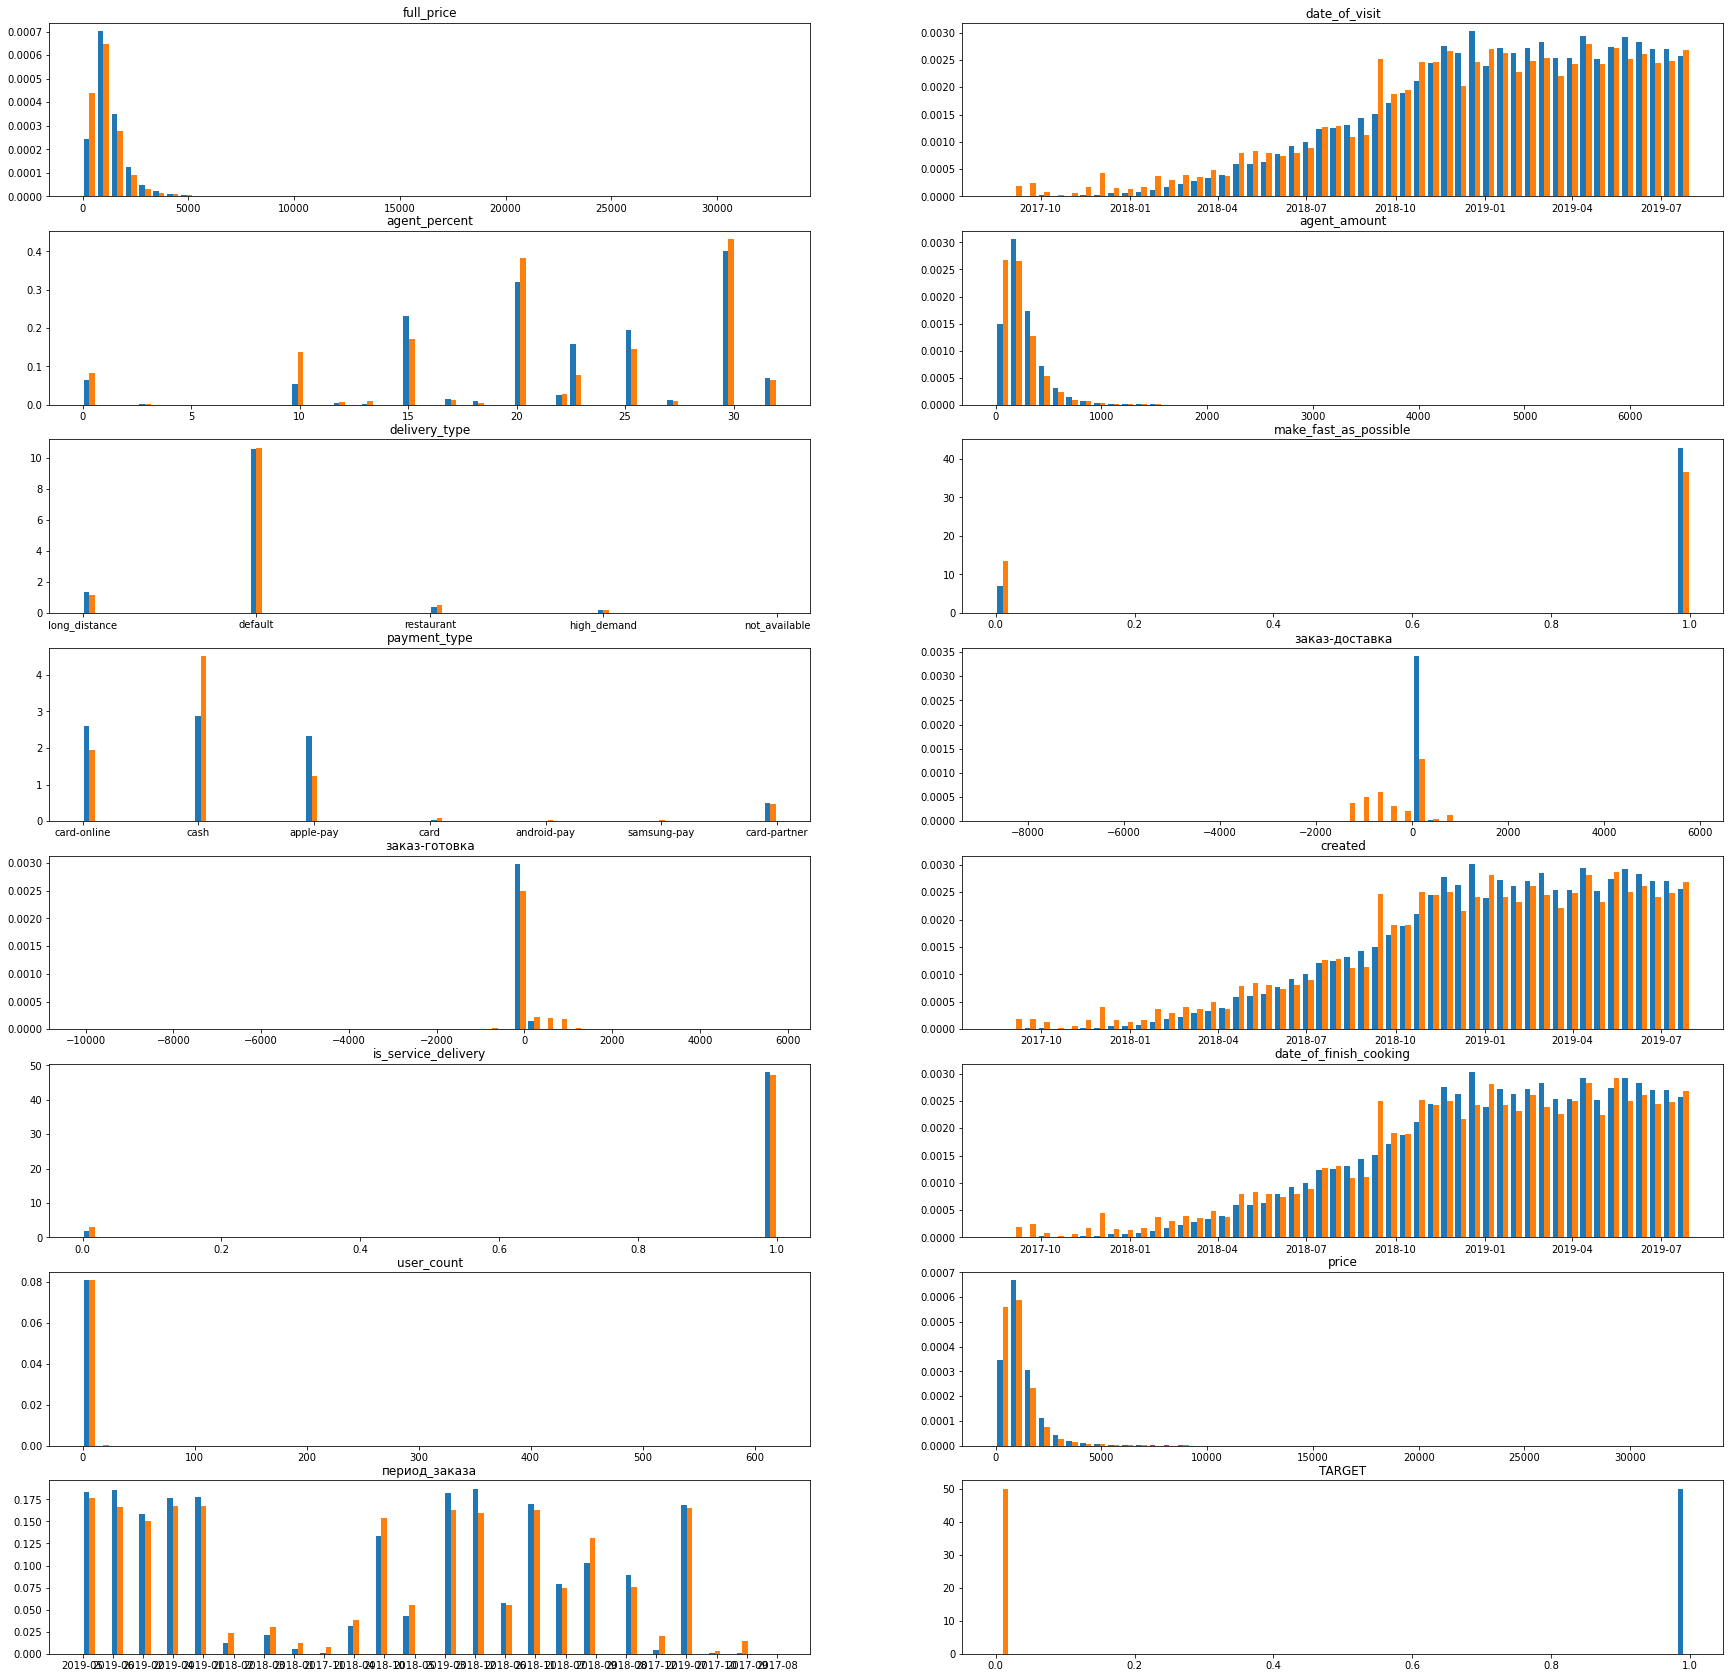

In [66]:
lis = ['full_price', 'date_of_visit','agent_percent','agent_amount','delivery_type','make_fast_as_possible','payment_type','заказ-доставка',
 'заказ-готовка','created','is_service_delivery','date_of_finish_cooking','user_count','price','период_заказа']


fig = plt.figure(figsize=(30,30))

i = 0
for z in lis:
    i = i + 1
    ax = fig.add_subplot(8,2,i)
    ax.set_title(str(z))
    ax.hist([df[str(z)][df['TARGET'] == 1], df[str(z)][df['TARGET'] == 0]], density=True, bins = 50);
    if i == 16:
        break
        
# Желтый - отмена
# Синий - заказ доставлен

In [70]:
Соотношение_доставленных_к_отмененным = pd.pivot_table(df, 
                                                       values=['id'],
                                                       columns = ['TARGET'],
                                                       index=['период_заказа'], aggfunc={'TARGET' : ['count']})

In [74]:
Соотношение_доставленных_к_отмененным['доля_отказов'] = Соотношение_доставленных_к_отмененным[('TARGET', 'count', 0)] / Соотношение_доставленных_к_отмененным[('TARGET', 'count', 1)]

<AxesSubplot:xlabel='период_заказа'>

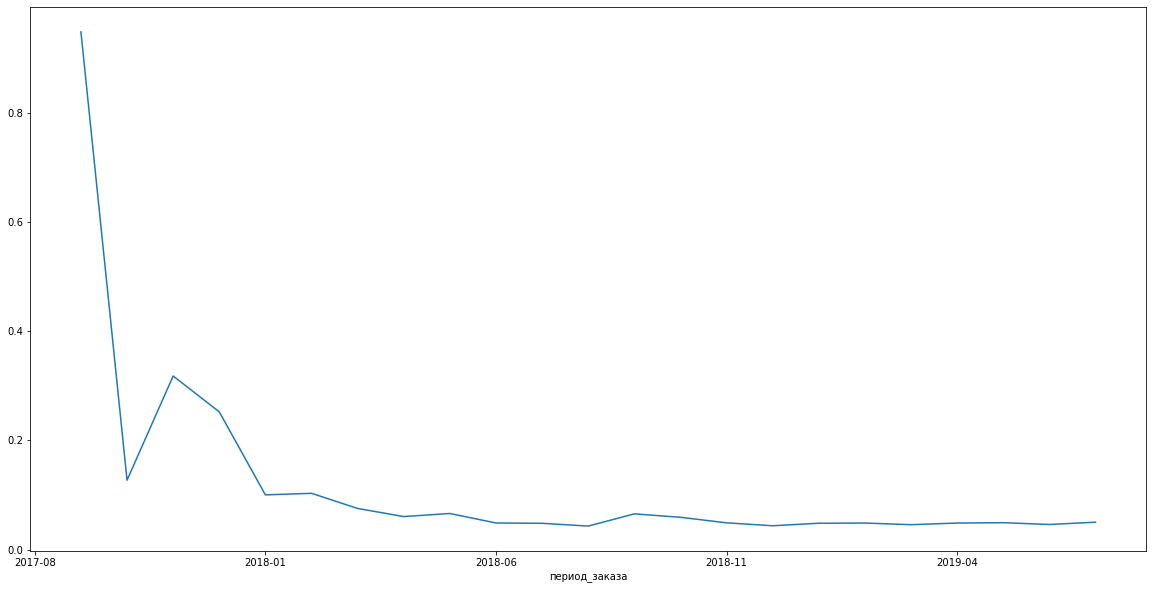

In [76]:
Соотношение_доставленных_к_отмененным['доля_отказов'].plot()
#Доля отмененых значительно снизилась с начала деятельности

# 2. Анализ потребления

In [13]:
Заказы_по_клиентам = pd.pivot_table(df, 
                                   values=['created', 'price', 'agent_percent', 'agent_amount'], 
                                   index=['client_id'], aggfunc={'created' : ['min', 'max', 'count'], 'price': 'sum', 'agent_percent' : 'mean', 'agent_amount' : 'sum' })

In [14]:
Заказы_по_клиентам.rename(columns={'count':'Количество_заказов',
                                     'max':'Последний_заказ',
                                     'min':'Первый_заказ',
                                     'sum':'Общая_сумма_заказов'}, inplace=True)

In [15]:
Заказы_по_клиентам['Период_сотрудничества'] = Заказы_по_клиентам['created']['Последний_заказ'] - Заказы_по_клиентам['created']['Первый_заказ'] + datetime.timedelta(days=1)

In [16]:
Заказы_по_клиентам['Период_сотрудничества'] = Заказы_по_клиентам['Период_сотрудничества'].astype("timedelta64[D]")

In [17]:
Заказы_по_клиентам['Частота_потребления'] = Заказы_по_клиентам['Период_сотрудничества'] / Заказы_по_клиентам['created']['Количество_заказов']

In [18]:
Заказы_по_клиентам['Mес_начала'] = pd.DatetimeIndex(Заказы_по_клиентам['created']['Первый_заказ']).month
Заказы_по_клиентам['Год_начала'] = pd.DatetimeIndex(Заказы_по_клиентам['created']['Первый_заказ']).year

Заказы_по_клиентам['Период_начала'] = Заказы_по_клиентам['created']['Первый_заказ'].dt.strftime('%Y-%m')
Заказы_по_клиентам['Период_последнего_заказа'] = Заказы_по_клиентам['created']['Последний_заказ'].dt.strftime('%Y-%m')

In [19]:
Заказы_по_клиентам['Количество_заказов_сегмент'] = np.where(Заказы_по_клиентам['created']['Количество_заказов'] == 1, '1_заказ', Заказы_по_клиентам['created']['Количество_заказов'])
Заказы_по_клиентам['Количество_заказов_сегмент'] = np.where((Заказы_по_клиентам['created']['Количество_заказов'] > 1) & (Заказы_по_клиентам['created']['Количество_заказов'] < 6), '2-5_заказов', Заказы_по_клиентам['Количество_заказов_сегмент'])
Заказы_по_клиентам['Количество_заказов_сегмент'] = np.where((Заказы_по_клиентам['created']['Количество_заказов'] > 5) & (Заказы_по_клиентам['created']['Количество_заказов'] < 21), '6-20_заказов', Заказы_по_клиентам['Количество_заказов_сегмент'])
Заказы_по_клиентам['Количество_заказов_сегмент'] = np.where((Заказы_по_клиентам['created']['Количество_заказов'] > 20), 'более_20_заказов', Заказы_по_клиентам['Количество_заказов_сегмент'])

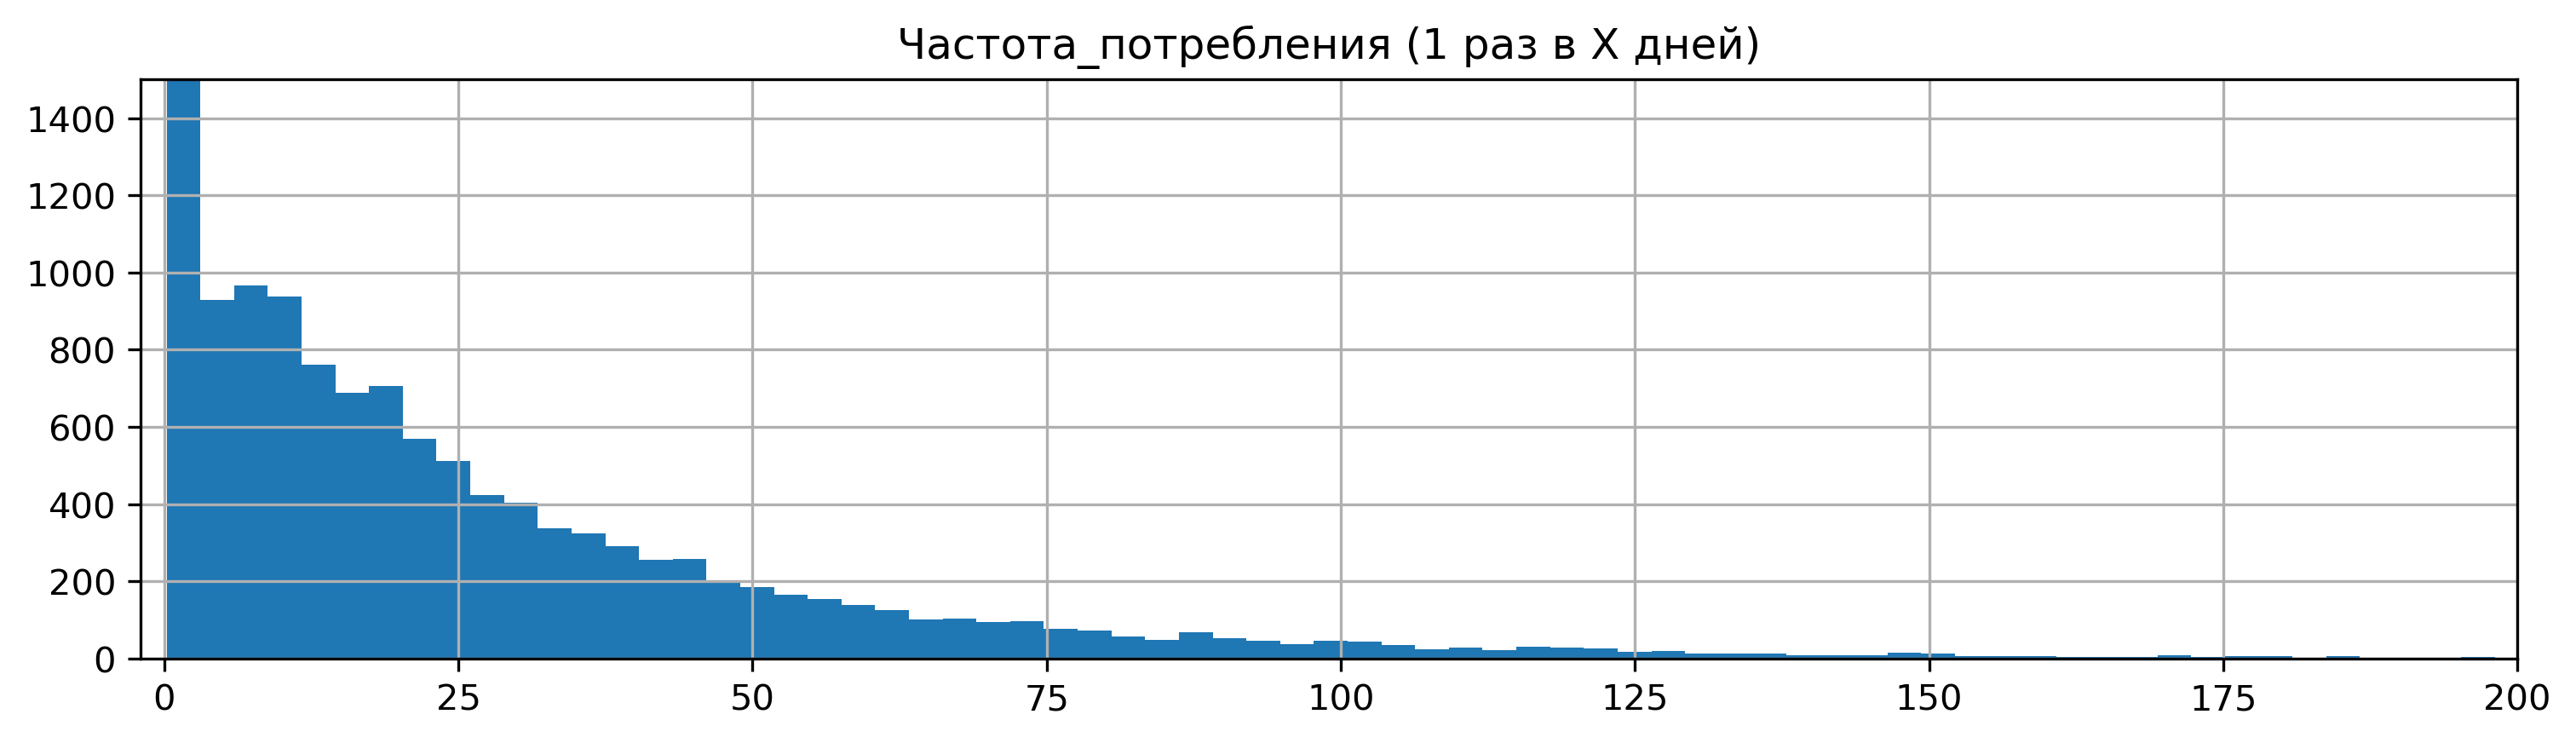

In [20]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)
axes.set_ylim([0, 1500])
axes.set_xlim([-2, 200])
axes.set_title('Частота_потребления (1 раз в Х дней)')
Заказы_по_клиентам['Частота_потребления'].hist(bins = 100);

# Необходимо напоминать о себе клиентам, которые не покупают больше своего стандартного периода потребления.
# Например клиент заказывает в среднем 1 раз в 10 дней. Если он не заказывает 15 дней. Нужно слать ему уведомление, 
# ...если отклика нет, то отправлять купон со скидкой.

# Если клиента нет более 100 дней вероятность его возврата минимальна.
# Необходимо напоминать о себе регулярно, но не надоедать, при этом давая ценность клиенту(Информация о новых блюдах, ресторанах) либо купоны

In [21]:
Потерявшиеся_клиенты = pd.pivot_table(Заказы_по_клиентам, 
                                                    values='price',
                                                    columns = 'Период_последнего_заказа',
                                                    index='Период_начала', aggfunc='count')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [22]:
Потерявшиеся_клиенты

# Есть большое поле для деятельности. Клиенты у которых последний заказ был более X дней назад

Общая_сумма_заказов                                  \
Период_последнего_заказа             2017-08 2017-09 2017-10 2017-11 2017-12   
Период_начала                                                                  
2017-08                                  1.0     NaN     NaN     NaN     NaN   
2017-09                                  NaN     5.0     NaN     NaN     NaN   
2017-10                                  NaN     NaN     3.0     NaN     1.0   
2017-11                                  NaN     NaN     NaN    20.0     NaN   
2017-12                                  NaN     NaN     NaN     NaN     7.0   
2018-01                                  NaN     NaN     NaN     NaN     NaN   
2018-02                                  NaN     NaN     NaN     NaN     NaN   
2018-03                                  NaN     NaN     NaN     NaN     NaN   
2018-04                                  NaN     NaN     NaN     NaN     NaN   
2018-05                                  NaN     NaN     NaN     NaN     NaN   
2018-06                                  NaN     NaN     NaN     NaN     NaN   
2018-07                                  NaN     NaN     NaN     NaN     NaN   
2018-08                                  NaN     NaN     NaN     NaN     NaN   
2018-09                                  NaN     NaN     NaN     NaN     NaN   
2018-10                                  NaN     NaN     NaN     NaN     NaN   
2018-11                                  NaN     NaN     NaN     NaN     NaN   
2018-12                                  NaN     NaN     NaN     NaN     NaN   
2019-01                                  NaN     NaN     NaN     NaN     NaN   
2019-02                                  NaN     NaN     NaN     NaN     NaN   
2019-03                                  NaN     NaN     NaN     NaN     NaN   
2019-04                                  NaN     NaN     NaN     NaN     NaN   
2019-05                                  NaN     NaN     NaN     NaN     NaN   
2019-06                                  NaN     NaN     NaN     NaN     NaN   
2019-07                                  NaN     NaN     NaN     NaN     NaN   

                                                                  ...          \
Период_последнего_заказа 2018-01 2018-02 2018-03 2018-04 2018-05  ... 2018-10   
Период_начала                                                     ...           
2017-08                      NaN     NaN     NaN     NaN     NaN  ...     NaN   
2017-09                      NaN     NaN     1.0     NaN     NaN  ...     NaN   
2017-10                      NaN     1.0     NaN     NaN     NaN  ...     2.0   
2017-11                      NaN     1.0     NaN     NaN     NaN  ...     NaN   
2017-12                      1.0     NaN     1.0     NaN     2.0  ...     2.0   
2018-01                     27.0     5.0     2.0     2.0     3.0  ...     2.0   
2018-02                      NaN    61.0     9.0     3.0     5.0  ...    11.0   
2018-03                      NaN     NaN    88.0    13.0     7.0  ...     3.0   
2018-04                      NaN     NaN     NaN   173.0    16.0  ...    13.0   
2018-05                      NaN     NaN     NaN     NaN   195.0  ...    23.0   
2018-06                      NaN     NaN     NaN     NaN     NaN  ...    19.0   
2018-07                      NaN     NaN     NaN     NaN     NaN  ...    33.0   
2018-08                      NaN     NaN     NaN     NaN     NaN  ...    49.0   
2018-09                      NaN     NaN     NaN     NaN     NaN  ...    78.0   
2018-10                      NaN     NaN     NaN     NaN     NaN  ...   930.0   
2018-11                      NaN     NaN     NaN     NaN     NaN  ...     NaN   
2018-12                      NaN     NaN     NaN     NaN     NaN  ...     NaN   
2019-01                      NaN     NaN     NaN     NaN     NaN  ...     NaN   
2019-02                      NaN     NaN     NaN     NaN     NaN  ...     NaN   
2019-03                      NaN     NaN     NaN     NaN     NaN  ...     NaN   
2

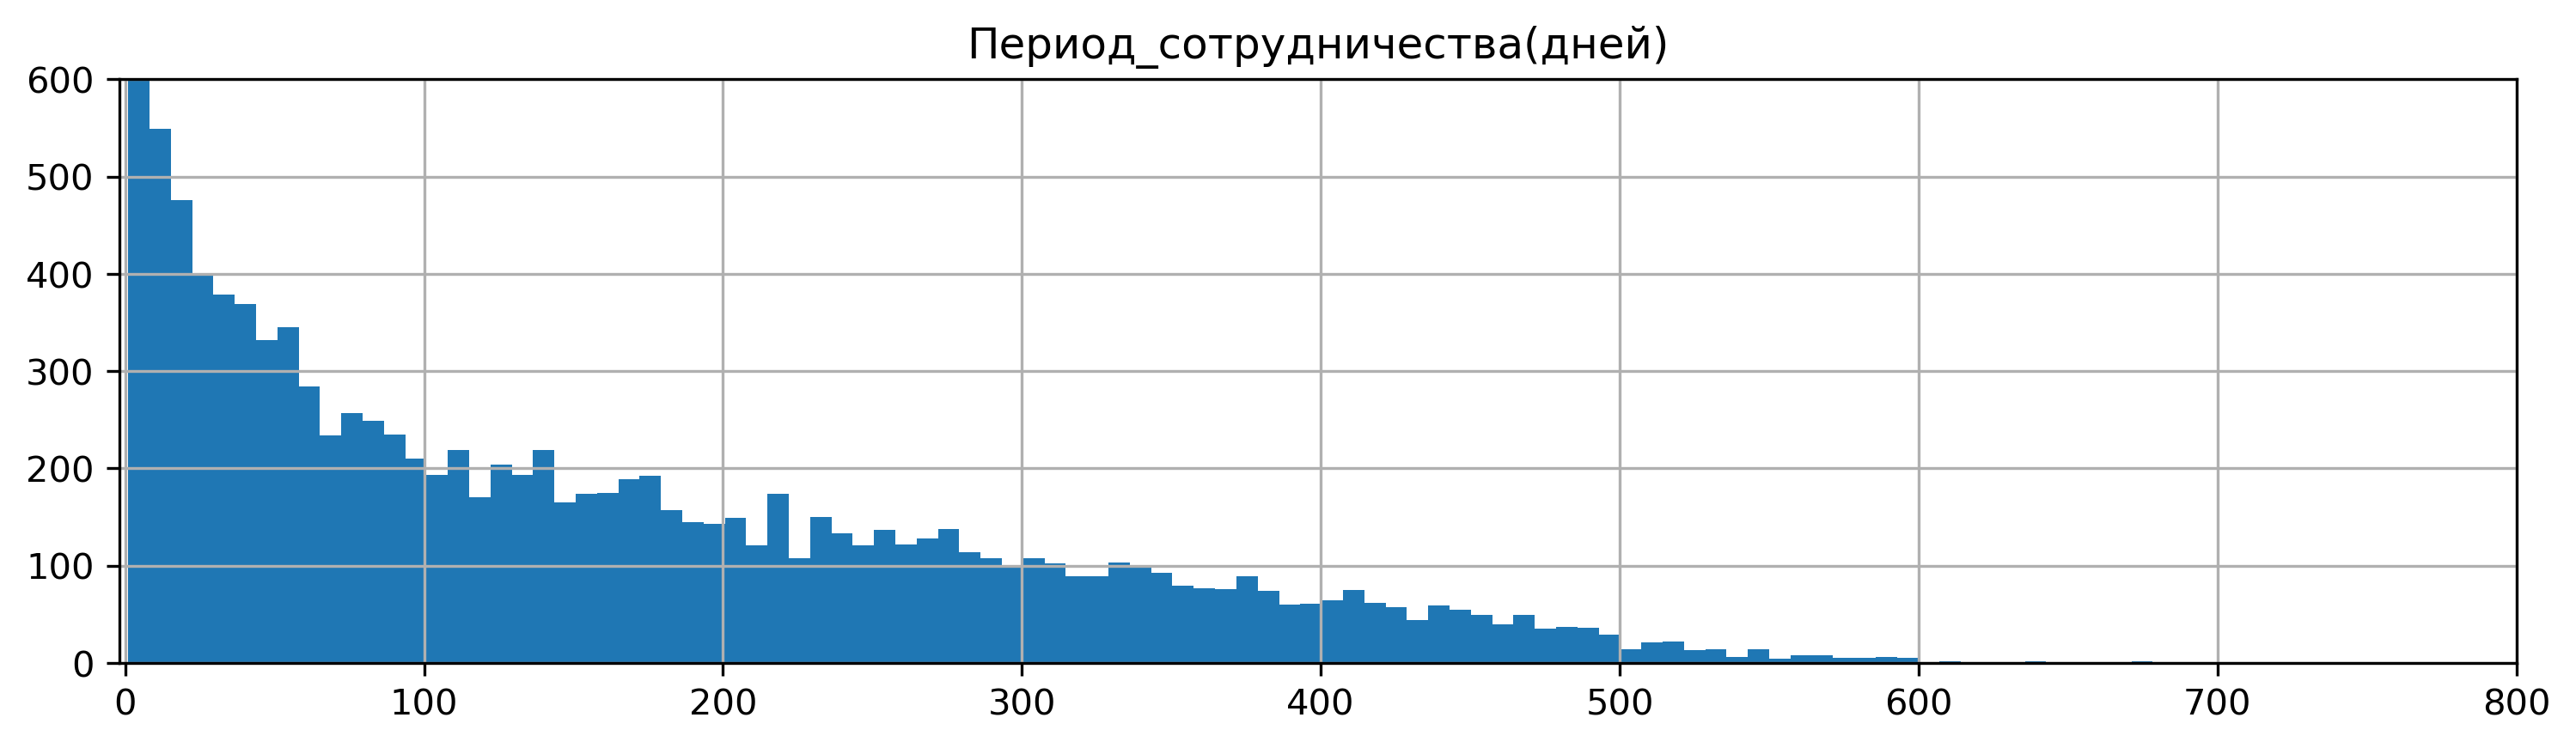

In [23]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)
axes.set_ylim([0, 600])
axes.set_xlim([-2, 800])
axes.set_title('Период_сотрудничества(дней)')
Заказы_по_клиентам['Период_сотрудничества'].hist(bins = 100);

In [24]:
Количество_заказов_сегменты = pd.pivot_table(Заказы_по_клиентам,
                                           values = 'Mес_начала', 
                                           columns = 'Количество_заказов_сегмент',  
                                           index = 'Период_начала', 
                                           aggfunc = 'count')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<AxesSubplot:xlabel='Период_начала'>

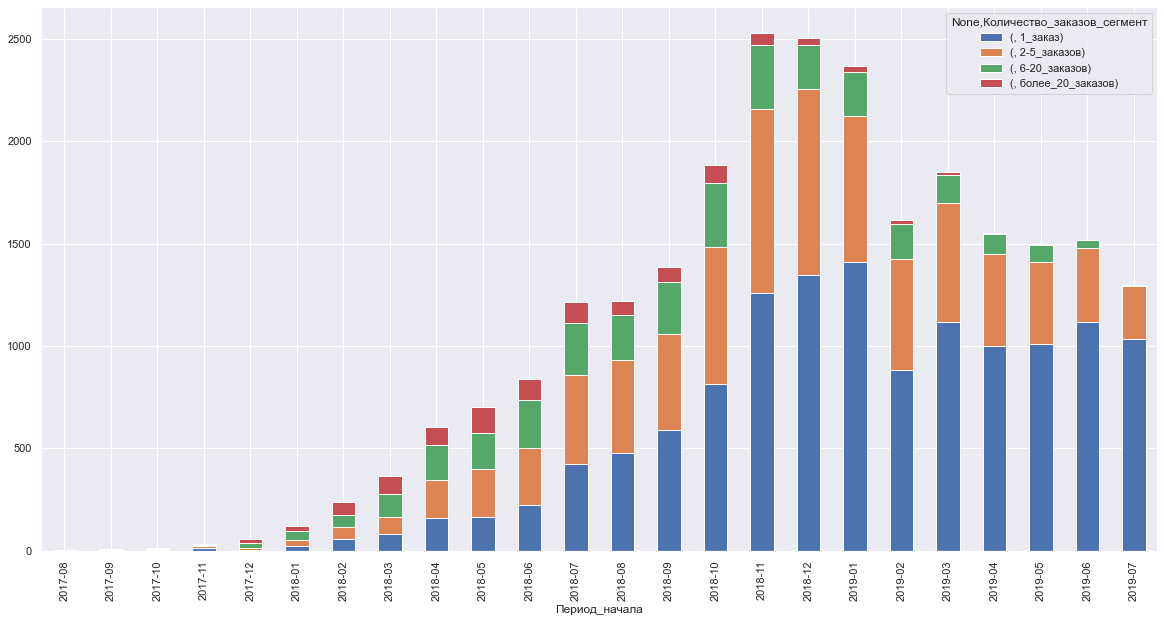

In [25]:
rcParams['figure.figsize'] = 20, 10

sns.set()
axes.set_title('Количество_заказов_сегменты')
Количество_заказов_сегменты.plot(kind='bar', stacked=True)

In [26]:
Заказы_по_клиентам['ID_Клиента'] = Заказы_по_клиентам.index

In [27]:
КА_1 = df[['client_id', 'created', 'price', 'full_price', 'agent_amount', 'agent_percent']]

In [28]:
КА = pd.merge(how='left', left=КА_1, right=Заказы_по_клиентам, left_on='client_id', right_on='ID_Клиента')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [29]:
КА['Период_заказа'] = КА['created'].dt.strftime('%Y-%m')

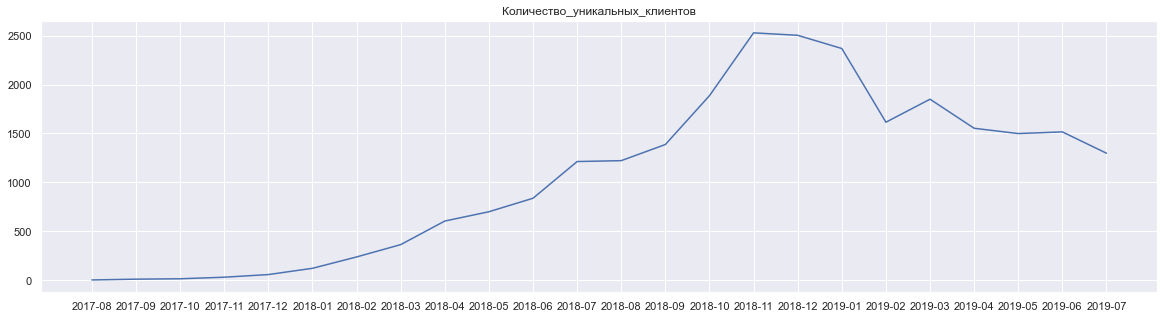

In [30]:
Количество_уникальных_клиентов = pd.pivot_table(Заказы_по_клиентам, 
                                   values=['ID_Клиента'],
                                   index=['Период_начала'], aggfunc='count')

fig, axes = plt.subplots(figsize=(20,5))
axes.set_title('Количество_уникальных_клиентов');
axes.plot(Количество_уникальных_клиентов);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


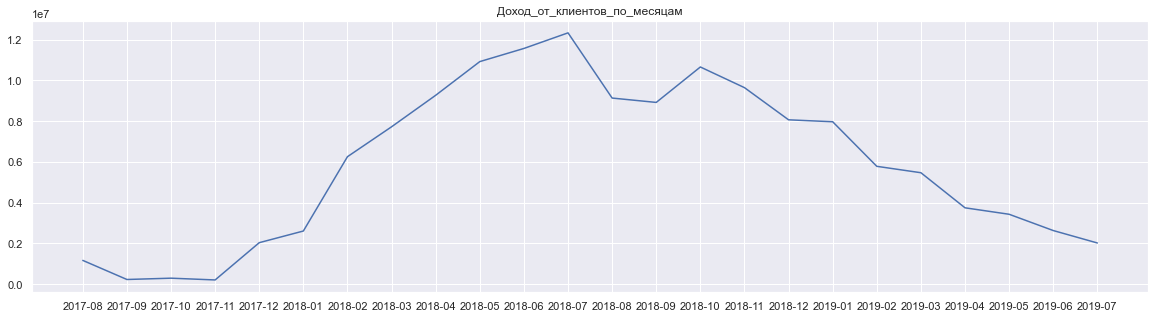

In [31]:
Доход_от_клиентов_по_месяцам = pd.pivot_table(Заказы_по_клиентам, 
                                                    values='price',
                                                    index='Период_начала', aggfunc='sum')
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title('Доход_от_клиентов_по_месяцам');
axes.plot(Доход_от_клиентов_по_месяцам);

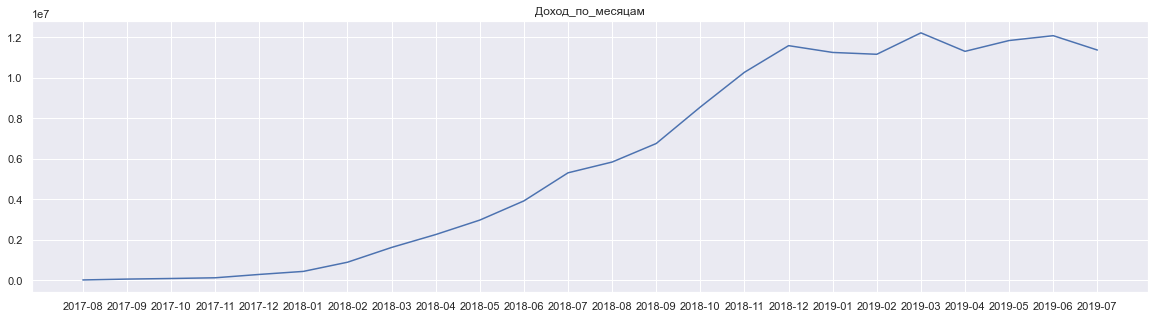

In [32]:
Доход_по_месяцам = pd.pivot_table(КА, 
                                   values=['price'],
                                   index=['Период_заказа'], aggfunc='sum')
                                            
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title('Доход_по_месяцам');
axes.plot(Доход_по_месяцам);

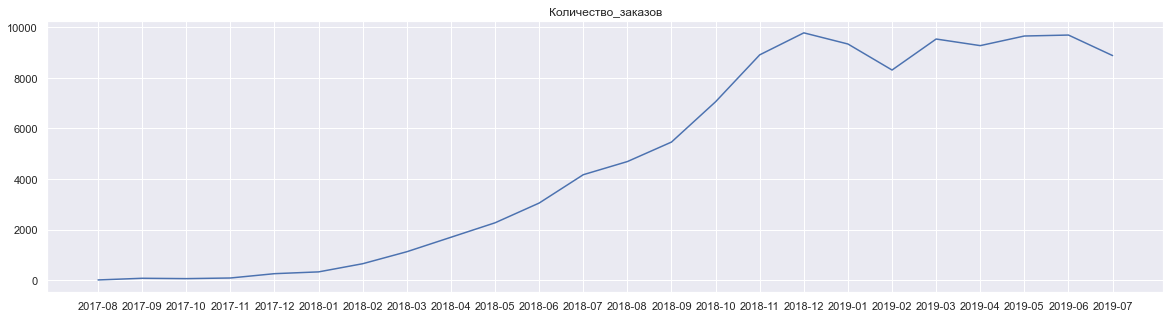

In [33]:
Количество_заказов = pd.pivot_table(КА,
                                           values = 'client_id',  
                                           index = 'Период_заказа', 
                                           aggfunc = 'count')
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title('Количество_заказов');
axes.plot(Количество_заказов);

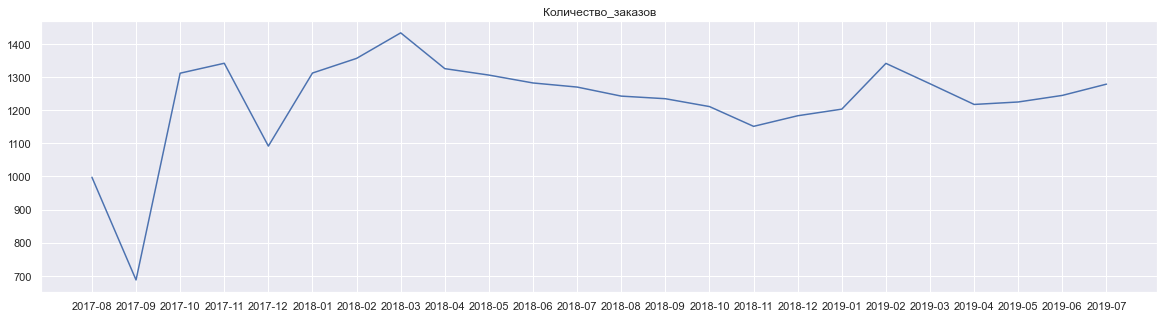

In [34]:
Количество_заказов = pd.pivot_table(КА,
                                           values = 'price',  
                                           index = 'Период_заказа', 
                                           aggfunc = 'mean')
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title('Количество_заказов');
axes.plot(Количество_заказов);

# 3. Кагортный анализ 

In [35]:
Кагортный_анализ_по_возвращаемости = pd.pivot_table(КА, 
                                   values=['client_id', 'price'],
                                   index=[('Период_начала', ''), 'Период_заказа'], aggfunc={'client_id' :'nunique', 'price' :'sum'})

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [36]:
Кагортный_анализ_по_возвращаемости['Период_начала_1'] = Кагортный_анализ_по_возвращаемости.index.get_level_values(('Период_начала', ''))
Кагортный_анализ_по_возвращаемости['Период_заказа_1'] = Кагортный_анализ_по_возвращаемости.index.get_level_values('Период_заказа')

In [37]:
КА_R = pd.merge(how='left', left=Кагортный_анализ_по_возвращаемости, right=Количество_уникальных_клиентов, left_on='Период_начала_1', right_on='Период_начала')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [38]:
КА_R['retention'] = КА_R['client_id'] / КА_R[('ID_Клиента', '')]

In [39]:
КА_R['Период_начала_1'] = pd.to_datetime(КА_R.Период_начала_1, format ='%Y-%m')
КА_R['Период_заказа_1'] = pd.to_datetime(КА_R.Период_заказа_1, format ='%Y-%m')

In [40]:
КА_R['мес_c_первого_посещения'] = КА_R['Период_заказа_1'] - КА_R['Период_начала_1']
КА_R['мес_c_первого_посещения'] = КА_R['мес_c_первого_посещения'].astype("timedelta64[M]")

In [41]:
Доход_по_месяцам['Период_заказа_1'] = Доход_по_месяцам.index

In [42]:
КА_TS = pd.merge(how='left', left=Кагортный_анализ_по_возвращаемости, right=Доход_по_месяцам, left_on='Период_заказа_1', right_on='Период_заказа')

In [43]:
КА_TS['Доля_в_ТО'] = КА_TS['price_x'] / КА_TS['price_y']

In [44]:
Кагортный_анализ_по_сумме = pd.pivot_table(КА, 
                                   values=['price'],
                                   columns=['Период_заказа'],        
                                   index=[('Период_начала', '')], aggfunc='sum')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [45]:
Кагортный_анализ_Доля_по_ТО = pd.pivot_table(КА_TS, 
                                   values=['Доля_в_ТО'],
                                   columns=['Период_заказа_1_x'],        
                                   index=['Период_начала_1'], aggfunc='mean')

In [46]:
Кагортный_анализ_по_количеству_клиентов = pd.pivot_table(КА, 
                                   values=['client_id'],
                                   columns=['Период_заказа'],        
                                   index=[('Период_начала', '')], aggfunc='nunique')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [47]:
Кагортный_анализ_по_агентской_премии = pd.pivot_table(КА, 
                                   values=['agent_percent'],
                                   columns=['Период_заказа'],        
                                   index=[('Период_начала', '')], aggfunc='mean')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [48]:
Кагортный_анализ_retention_по_количеству_месяцев = pd.pivot_table(КА_R, 
                                   values=['retention'],
                                   columns=['мес_c_первого_посещения'],         
                                   index=['Период_начала_1',], aggfunc='sum')

In [49]:
Кагортный_анализ_retention_по_месяцам = pd.pivot_table(КА_R, 
                                   values=['retention'],
                                   columns=['Период_заказа_1'],         
                                   index=['Период_начала_1',], aggfunc='sum')

In [50]:
(Кагортный_анализ_по_сумме / 1000).round().style.format("{:.1f}").background_gradient(cmap='Blues', axis=1)

In [51]:
rcParams['figure.figsize'] = 20, 12
(Кагортный_анализ_Доля_по_ТО * 100).style.format("{:.1f}").background_gradient(cmap='Blues', axis=0)

In [52]:
rcParams['figure.figsize'] = 20, 12
Кагортный_анализ_по_агентской_премии.style.format("{:.0f}").background_gradient(cmap='Blues', axis=1)

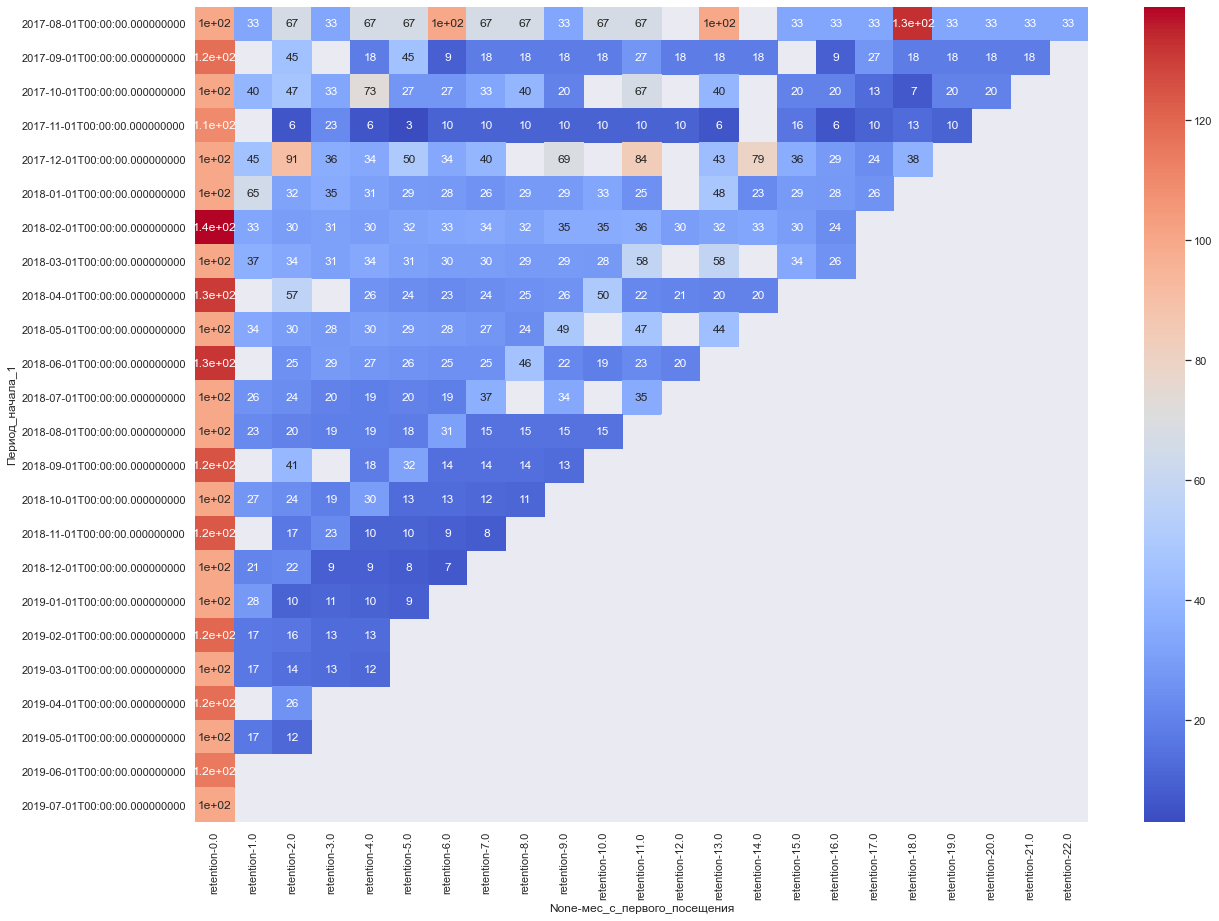

In [53]:
rcParams['figure.figsize'] = 20, 15
sns.heatmap((Кагортный_анализ_retention_по_количеству_месяцев * 100).round(),cmap='coolwarm',annot=True);

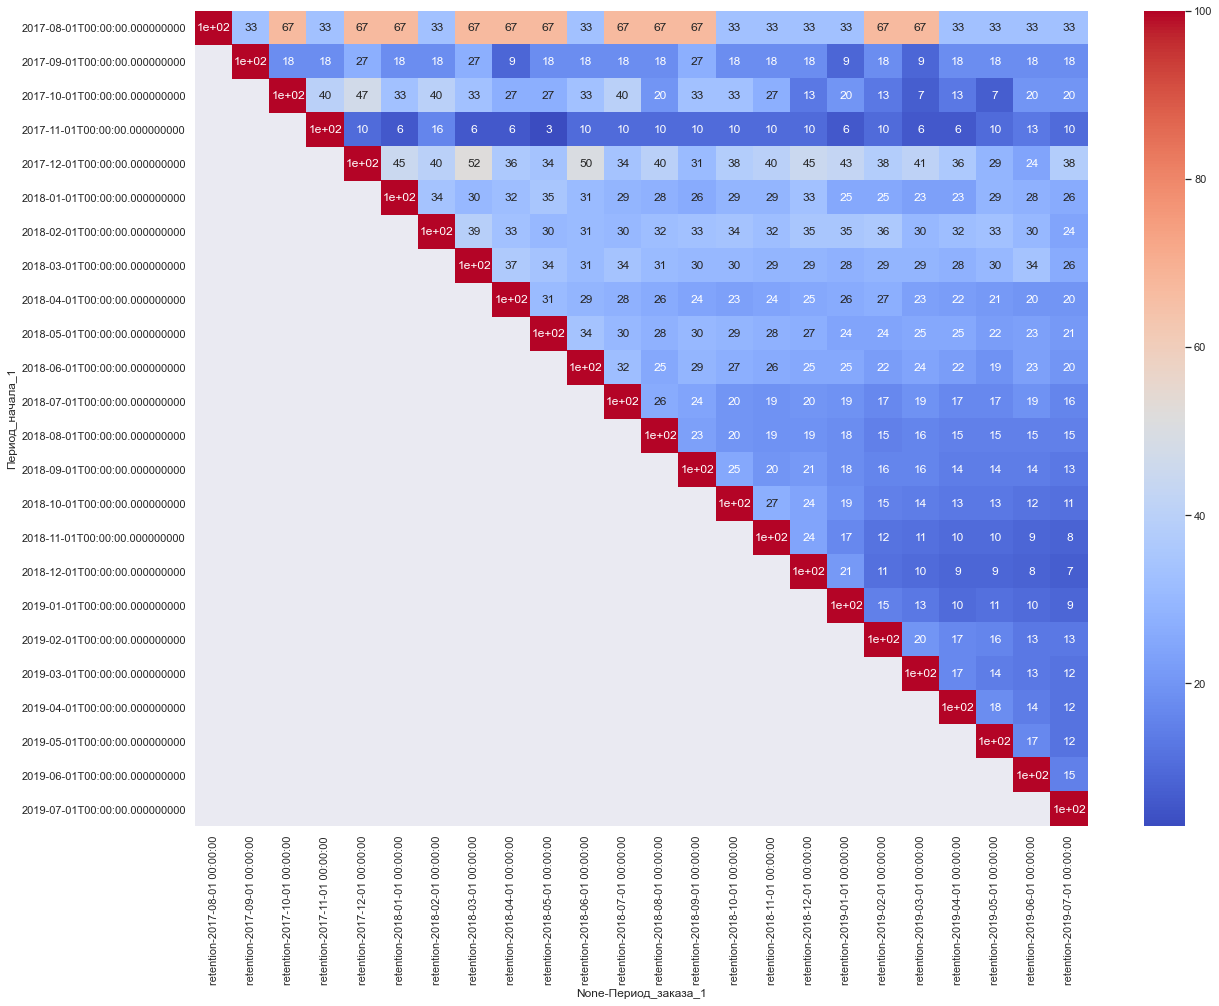

In [54]:
rcParams['figure.figsize'] = 20, 15
sns.heatmap((Кагортный_анализ_retention_по_месяцам * 100).round(),cmap='coolwarm',annot=True);

In [55]:
СВОД_частота_потребления = pd.pivot_table(КА, 
                                                           values=['price', 'client_id'],       
                                                           index=[('Период_начала', ''), 'Период_заказа'], aggfunc={'price':'count', 'client_id' :'nunique'})

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [56]:
СВОД_частота_потребления['ср_число_заказо_на_клиента'] = СВОД_частота_потребления['price'] / СВОД_частота_потребления['client_id']
Кагортный_анализ_по_частоте_потребления = pd.pivot_table(СВОД_частота_потребления, 
                                                           values='ср_число_заказо_на_клиента',
                                                           columns = 'Период_заказа',
                                                           index=[('Период_начала', '')], aggfunc='sum')

In [57]:
Кагортный_анализ_по_частоте_потребления.style.format("{:.1f}").background_gradient(cmap='Blues', axis=1)

Период_заказа,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
"('Период_начала', '')",,,,,,,,,,,,,,,,,,,,,,,,
2017-08,3.3,53.0,12.0,15.0,33.0,20.0,52.0,30.5,28.5,15.5,50.0,14.0,22.0,23.0,43.0,43.0,41.0,39.0,23.5,25.0,45.0,33.0,39.0,24.0
2017-09,nan,2.1,1.0,3.0,13.7,10.5,11.0,7.7,13.0,4.5,6.0,1.0,4.0,2.3,5.5,11.5,6.5,11.0,16.5,36.0,22.0,24.0,23.5,13.0
2017-10,nan,nan,2.4,1.5,2.6,2.0,4.8,4.8,4.0,3.0,1.2,1.3,2.3,3.2,2.6,1.2,2.0,1.0,1.5,1.0,1.5,1.0,1.7,1.0
2017-11,nan,nan,nan,1.8,1.0,3.0,1.6,4.0,1.5,2.0,1.0,3.0,4.0,1.7,1.3,1.3,1.3,3.0,2.0,1.0,3.0,1.3,3.5,2.3
2017-12,nan,nan,nan,nan,2.2,2.3,2.5,3.1,2.4,2.9,2.7,2.7,2.9,4.3,2.9,3.7,3.8,2.9,4.5,4.6,4.0,4.0,3.9,3.5
2018-01,nan,nan,nan,nan,nan,1.6,2.8,2.8,2.4,2.9,2.5,2.9,3.1,2.6,1.8,2.2,2.6,2.2,2.9,3.2,3.2,2.5,2.9,3.0
2018-02,nan,nan,nan,nan,nan,nan,1.5,2.5,2.8,2.9,2.8,3.0,3.1,2.8,3.1,3.2,3.1,3.3,3.5,3.8,3.5,3.2,3.6,3.1
2018-03,nan,nan,nan,nan,nan,nan,nan,1.6,2.5,2.7,2.6,2.7,2.6,2.7,2.9,2.8,2.7,2.8,2.5,2.7,2.6,2.4,2.8,2.6
2018-04,nan,nan,nan,nan,nan,nan,nan,nan,1.5,2.3,2.3,2.2,2.1,2.3,2.7,2.5,2.5,2.2,2.3,2.7,2.9,2.9,3.1,2.7


In [58]:
СВОД_СЧ = pd.pivot_table(КА, 
                         values=['price', 'client_id'],
                         index=[('Период_начала', ''), 'Период_заказа'], aggfunc={'price':'sum', 'client_id' :'nunique'})

СВОД_СЧ['CЧ_клиента'] = СВОД_СЧ['price'] / СВОД_СЧ['client_id']

Кагортный_анализ_по_СЧ = pd.pivot_table(СВОД_СЧ, 
                                                           values='CЧ_клиента',
                                                           columns = 'Период_заказа',
                                                           index=[('Период_начала', '')], aggfunc='sum')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [59]:
# Анализ среднего чека
(Кагортный_анализ_по_СЧ / 1000).style.format("{:.1f}").background_gradient(cmap='Blues', axis=1)

Период_заказа,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
"('Период_начала', '')",,,,,,,,,,,,,,,,,,,,,,,,
2017-08,3.3,33.6,13.3,28.7,34.6,24.4,56.7,32.6,31.9,18.4,48.6,16.9,24.1,27.6,46.9,56.5,73.8,58.1,36.2,36.7,48.0,33.7,47.2,26.3
2017-09,nan,1.7,1.7,0.8,3.9,6.7,3.4,3.6,10.6,2.4,6.0,0.7,3.3,1.9,5.6,5.0,3.6,9.8,4.7,9.9,3.5,8.7,8.6,9.2
2017-10,nan,nan,3.4,1.6,2.8,2.0,5.0,3.3,4.3,3.3,1.7,1.6,3.6,4.9,4.7,1.4,5.3,1.9,3.3,1.3,1.3,3.0,2.0,1.3
2017-11,nan,nan,nan,2.5,2.0,3.8,1.5,2.1,1.6,0.9,0.8,3.6,4.4,1.9,1.8,1.5,1.6,4.7,2.6,1.4,2.7,1.0,3.9,1.9
2017-12,nan,nan,nan,nan,3.0,3.3,3.7,3.8,3.1,3.5,3.6,4.1,4.1,6.1,4.2,5.3,5.8,3.8,6.0,4.8,4.3,5.2,4.9,4.2
2018-01,nan,nan,nan,nan,nan,2.2,4.1,4.0,3.3,4.2,3.5,3.9,4.0,4.1,2.4,2.8,3.5,3.0,4.1,4.4,4.5,3.2,4.0,4.1
2018-02,nan,nan,nan,nan,nan,nan,2.2,3.7,4.1,4.4,4.0,3.9,4.3,4.0,4.1,4.0,4.4,4.8,4.8,5.6,4.9,4.3,5.1,4.3
2018-03,nan,nan,nan,nan,nan,nan,nan,2.5,3.7,3.7,3.3,3.5,3.5,3.5,4.2,4.1,4.5,4.6,4.1,3.9,3.7,3.7,4.2,3.6
2018-04,nan,nan,nan,nan,nan,nan,nan,nan,1.9,3.4,3.3,3.0,2.9,3.2,3.7,3.6,3.7,3.2,3.7,3.9,4.0,4.2,5.1,3.9


In [60]:
LTV = pd.pivot_table(Заказы_по_клиентам, 
                         values=[('price', 'Общая_сумма_заказов'), ('agent_amount', 'Общая_сумма_заказов')],
                         index=[('Период_начала', '')], aggfunc={('price', 'Общая_сумма_заказов'):'mean', ('agent_amount', 'Общая_сумма_заказов'):'mean' })

In [61]:
LTV.columns = ['Средние_расходы_на_клиента', 'Средний_доход_на_клиента']
LTV['Средняя_прибыль_с_клиента'] = LTV['Средний_доход_на_клиента'] - LTV['Средние_расходы_на_клиента'] 
LTV['марженальность'] = LTV['Средняя_прибыль_с_клиента']  / LTV['Средний_доход_на_клиента']
LTV

,Средние_расходы_на_клиента,Средний_доход_на_клиента,Средняя_прибыль_с_клиента,марженальность
"(Период_начала, )",,,,
2017-08,73457.003333,387197.333333,313740.330000,0.810285
2017-09,3740.460000,20446.681818,16706.221818,0.817063
2017-10,3165.097333,19275.400000,16110.302667,0.835796
2017-11,1152.370000,6533.612903,5381.242903,0.823624
2017-12,7083.650517,35022.000000,27938.349483,0.797737
2018-01,4303.584180,21340.344262,17036.760082,0.798336
2018-02,5441.578992,26263.544538,20821.965546,0.792809
2018-03,4368.205989,21203.645055,16835.439066,0.793988
2018-04,3195.464364,15312.633107,12117.168744,0.791318


# 4. Анализ дополнительных метрик

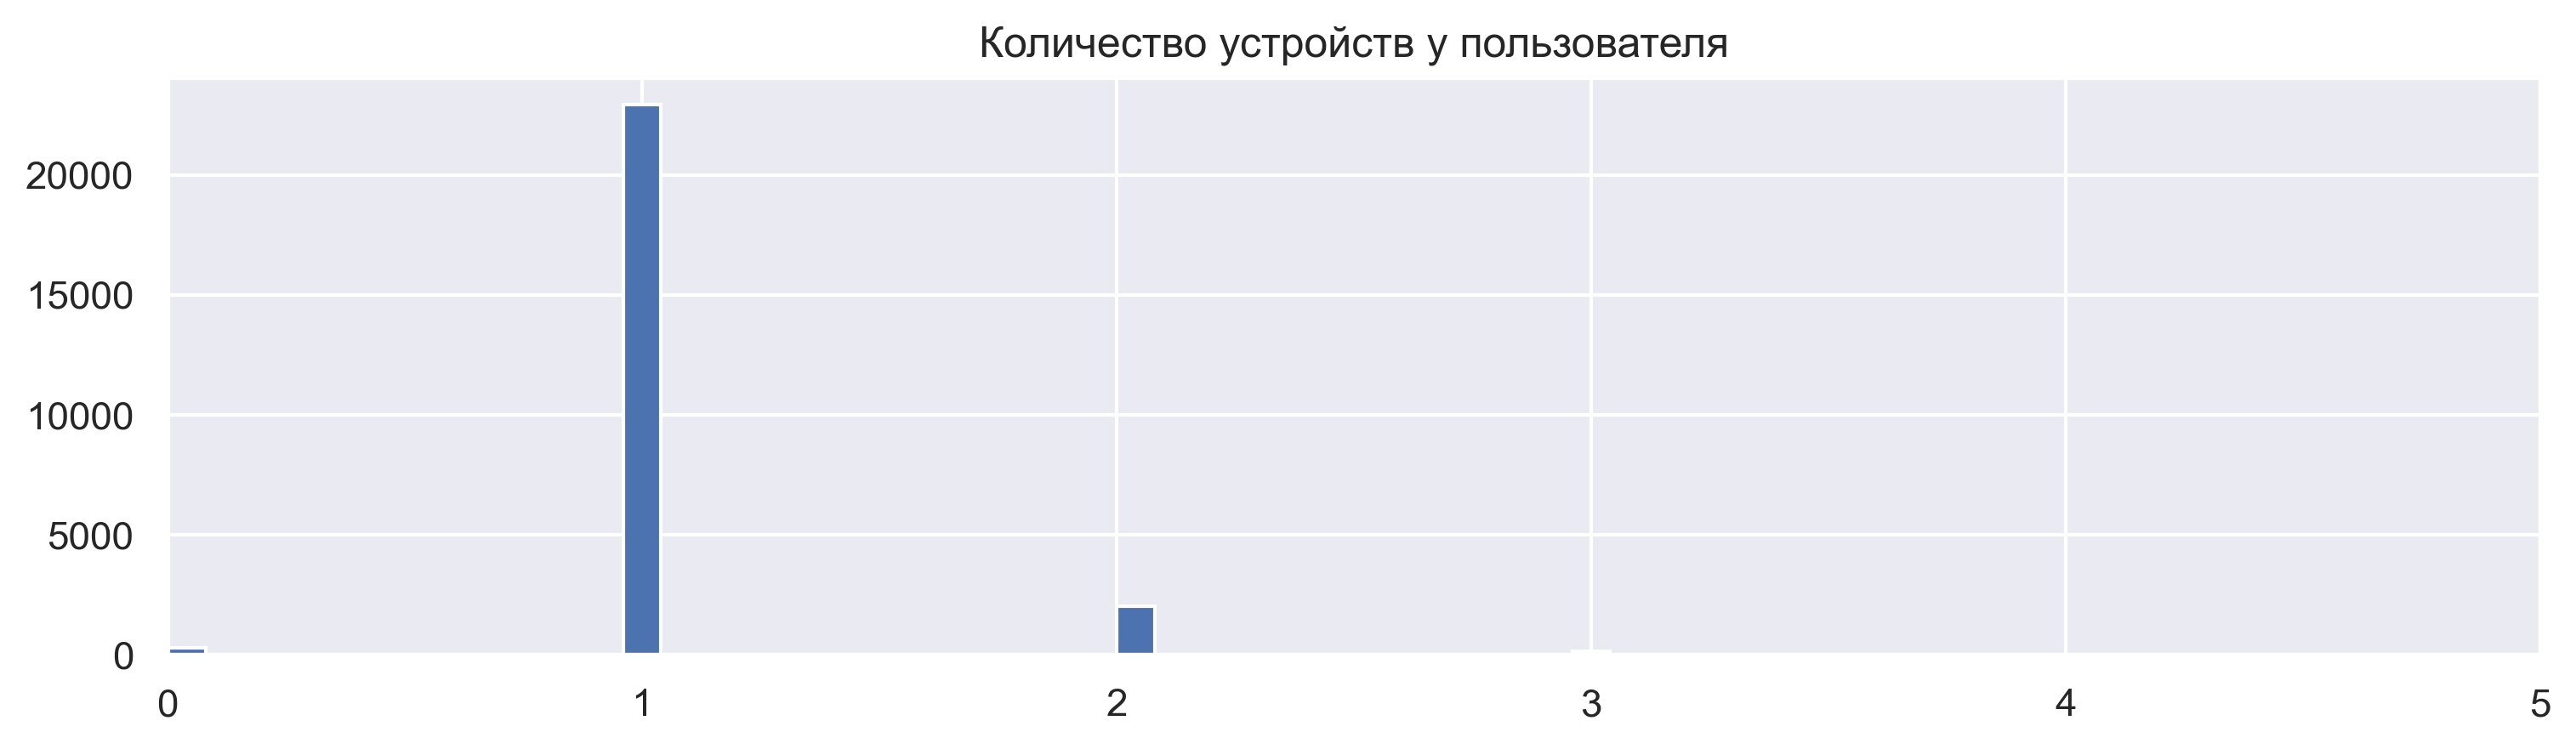

In [62]:
Устройства = pd.pivot_table(df, 
                            values=['application_id'],       
                            index=['client_id',], aggfunc='nunique')

fig, axes = plt.subplots(figsize=(12,3), dpi=300)
axes.set_xlim([0, 5])
axes.set_title('Количество устройств у пользователя')
axes.hist(Устройства, bins = 50);

# Как правило пользователь пользуется 1, реже 2 устройствами

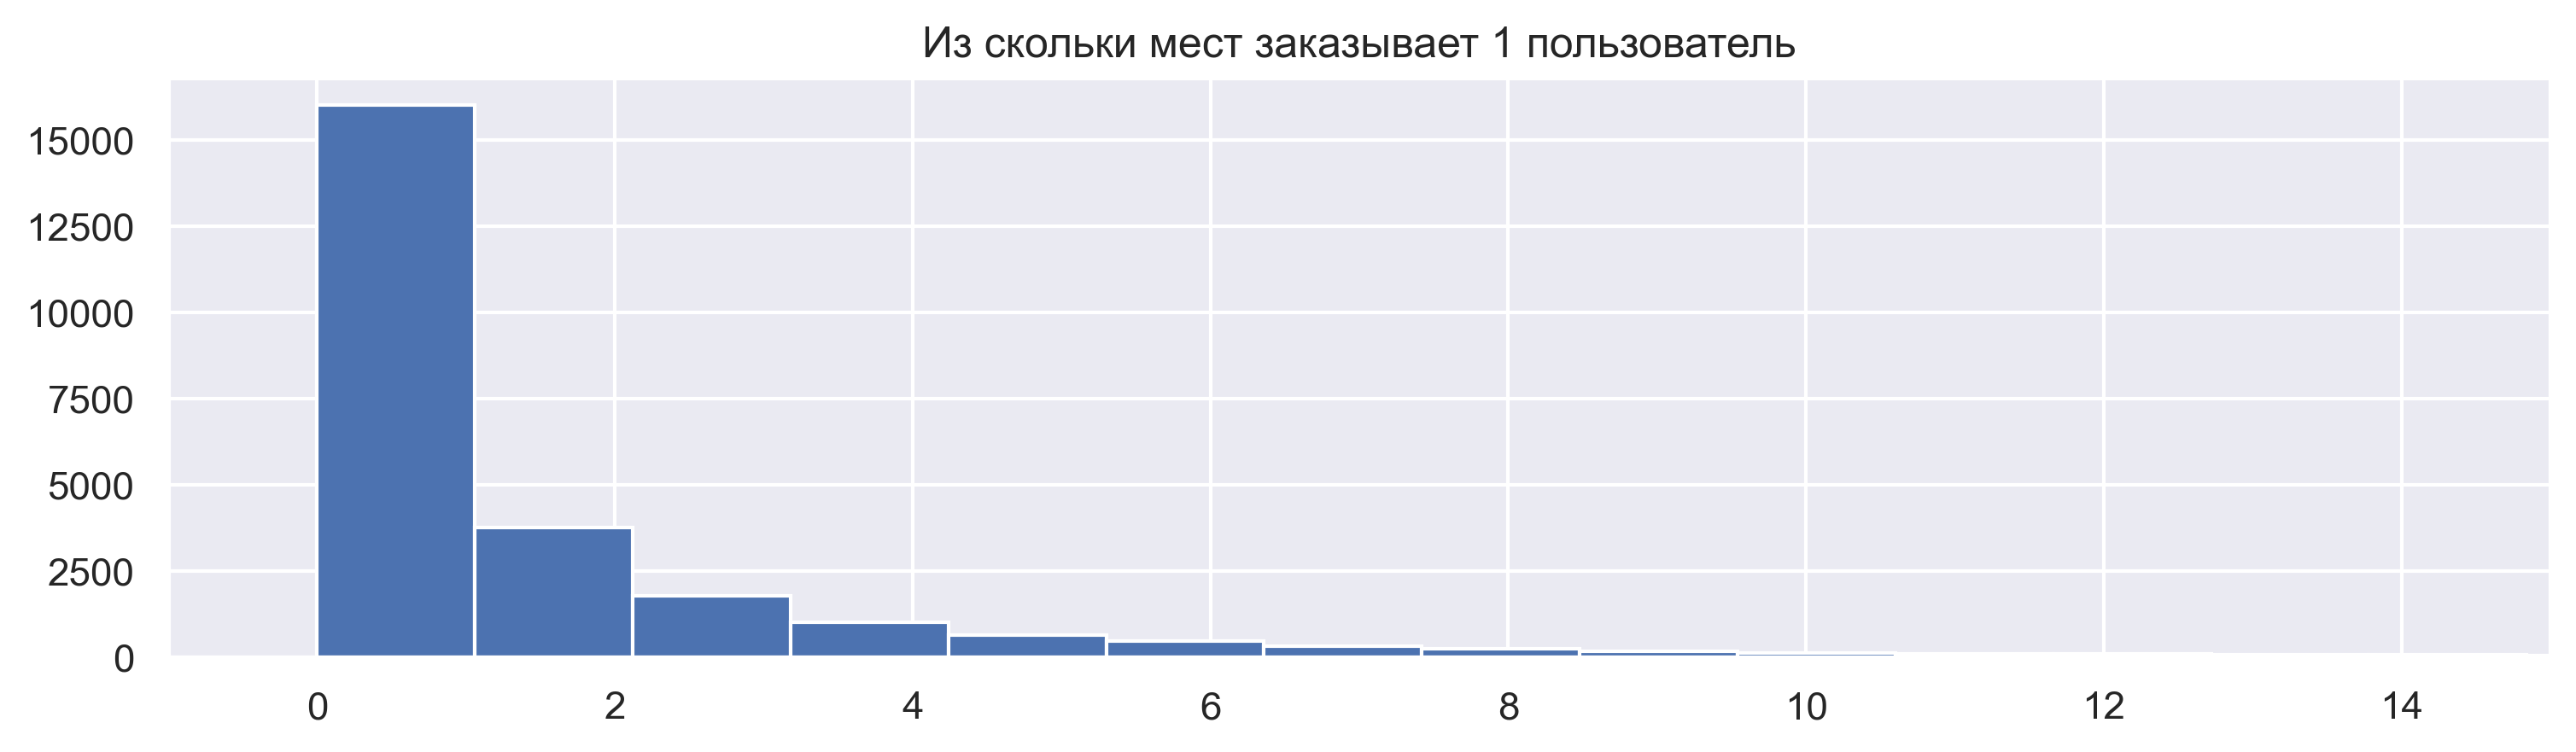

In [63]:
Из_скольки_мест_заказывает_клиент = pd.pivot_table(df, 
                            values=['place_id'],       
                            index=['client_id',], aggfunc='nunique')

fig, axes = plt.subplots(figsize=(12,3), dpi=300)
axes.set_xlim([-1, 15])
axes.set_title('Из скольки мест заказывает 1 пользователь')
axes.hist(Из_скольки_мест_заказывает_клиент, bins = 100);

# Один клиент может заказывать из разных мест (Дома, в гостях, на работе)

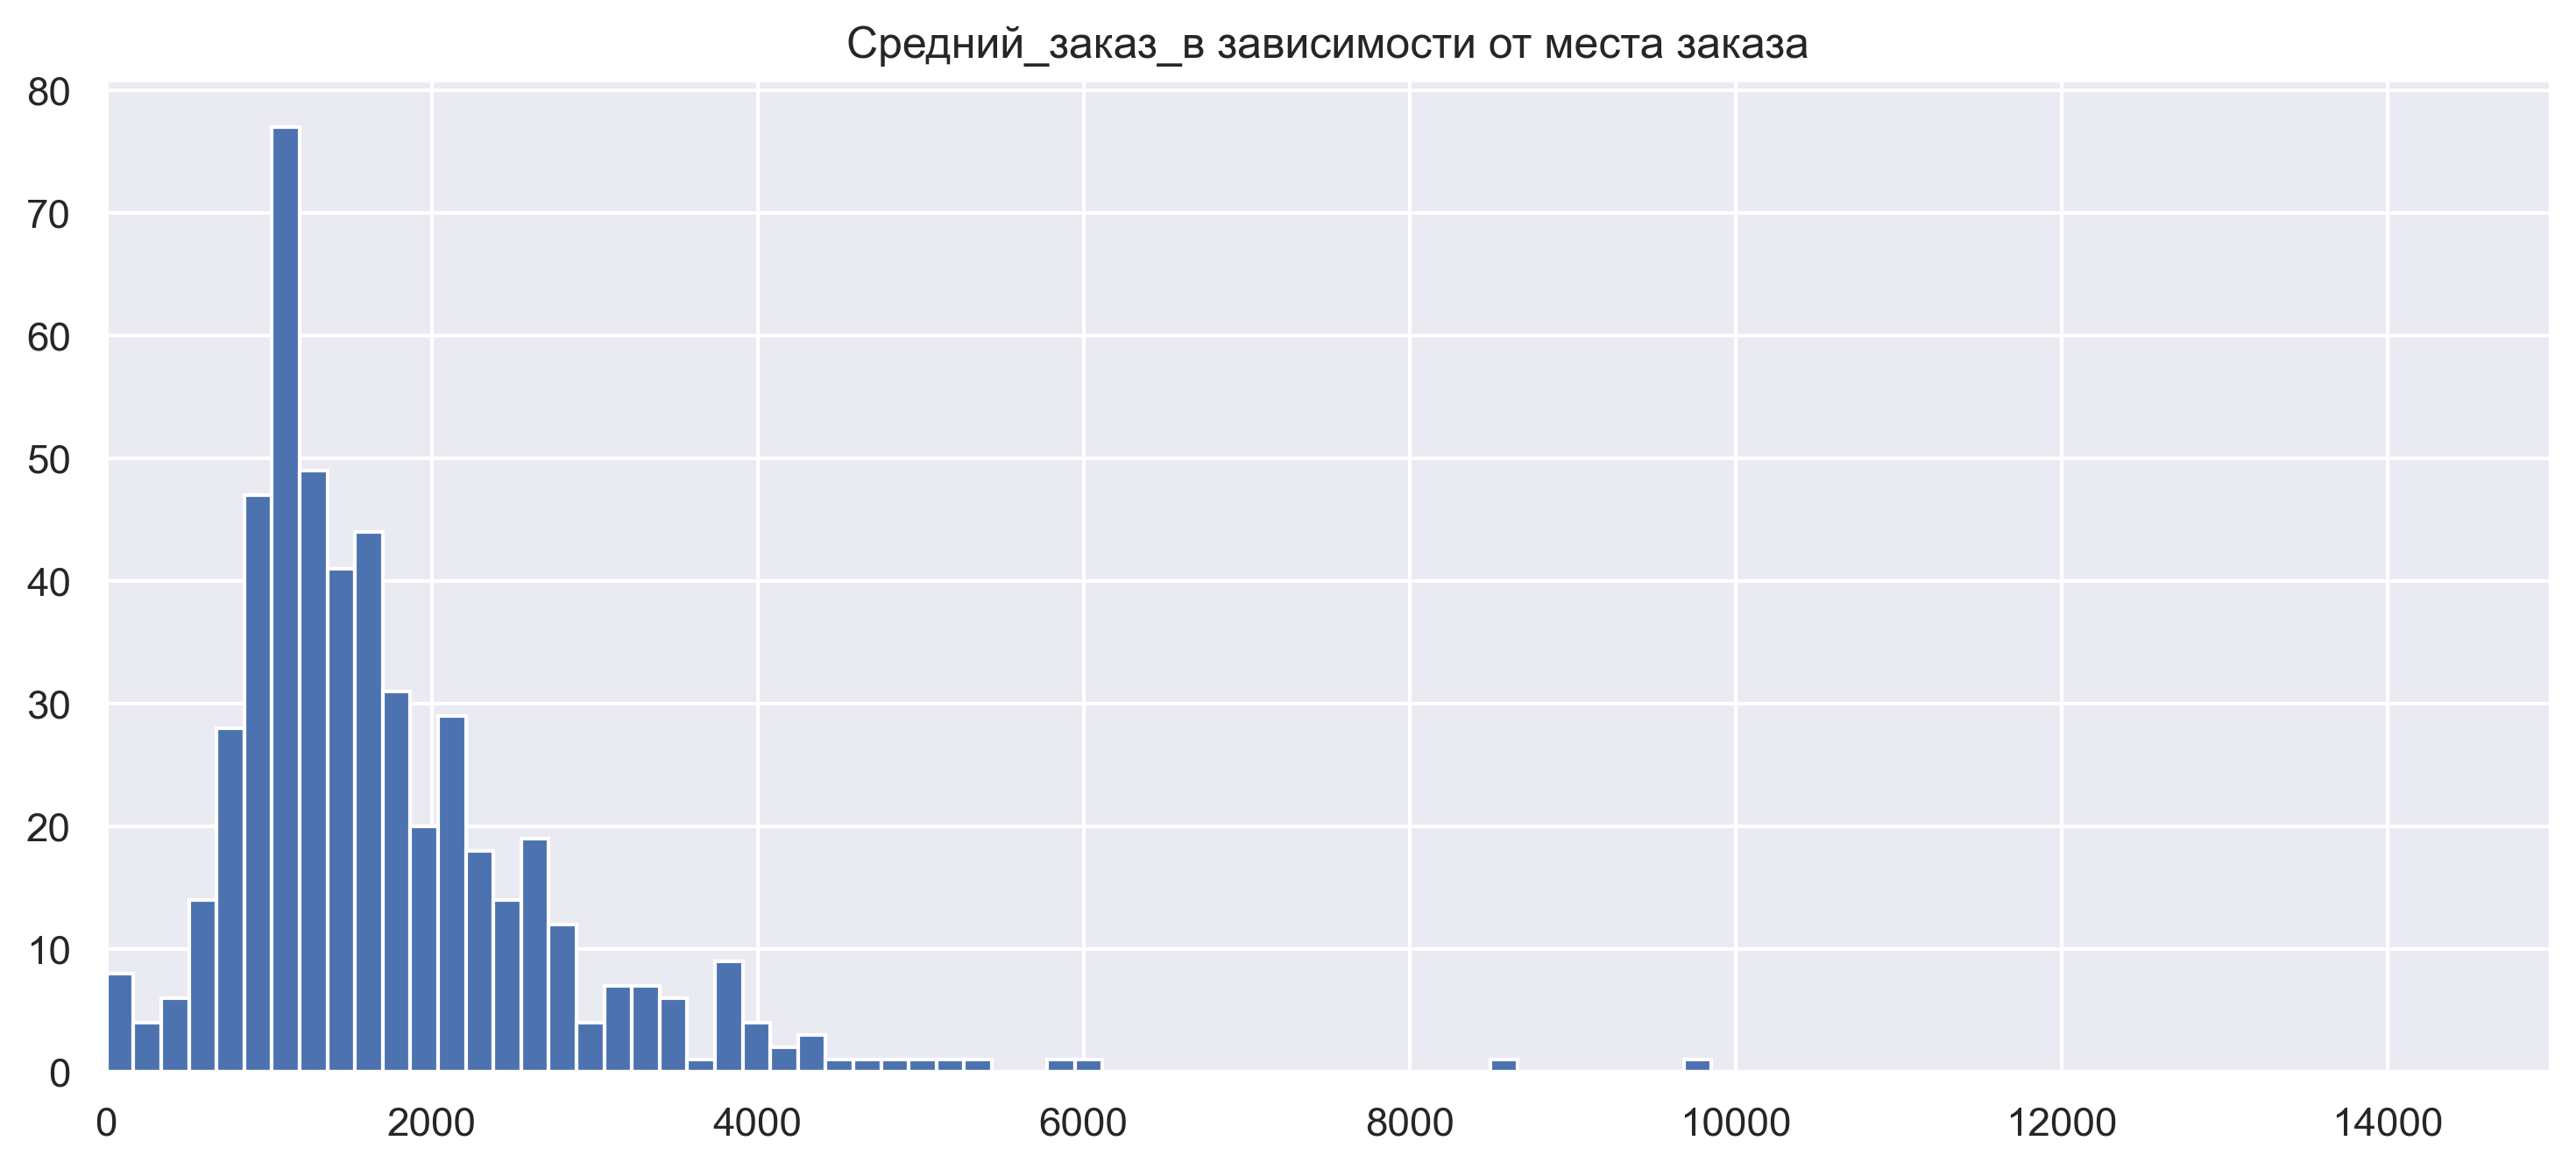

In [64]:
Сколько_из_одного_места_заказывает_клиентов = pd.pivot_table(df, 
                                                            values=['client_id', 'price'],       
                                                            index=['place_id',], aggfunc={'client_id' : 'nunique', 'price' : 'sum'})

Сколько_из_одного_места_заказывает_клиентов['Средний_доход_с_места'] = Сколько_из_одного_места_заказывает_клиентов['price'] / Сколько_из_одного_места_заказывает_клиентов['client_id']


fig, axes = plt.subplots(figsize=(12,5), dpi=300)
axes.set_xlim([-1, 15000])
axes.set_title('Средний_заказ_в зависимости от места заказа')
axes.hist(Сколько_из_одного_места_заказывает_клиентов['Средний_доход_с_места'], bins = 150);

# От места в значительной степени зависит сумма заказа. Распределение похоже на нормальное с незначительным смещением.

# 5. Кластеризация мест заказов (KMeans)

In [65]:
Данные_о_местоположение = df[['id', 'latitude', 'longitude', 'price', 'place_id', 'client_id']]

Данные_о_местоположение['place_id'] = pd.factorize(Данные_о_местоположение.place_id)[0]

Данные_о_местоположение.fillna(0, inplace=True)

<ipython-input-65-c0a3bb1b1785>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Данные_о_местоположение['place_id'] = pd.factorize(Данные_о_местоположение.place_id)[0]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


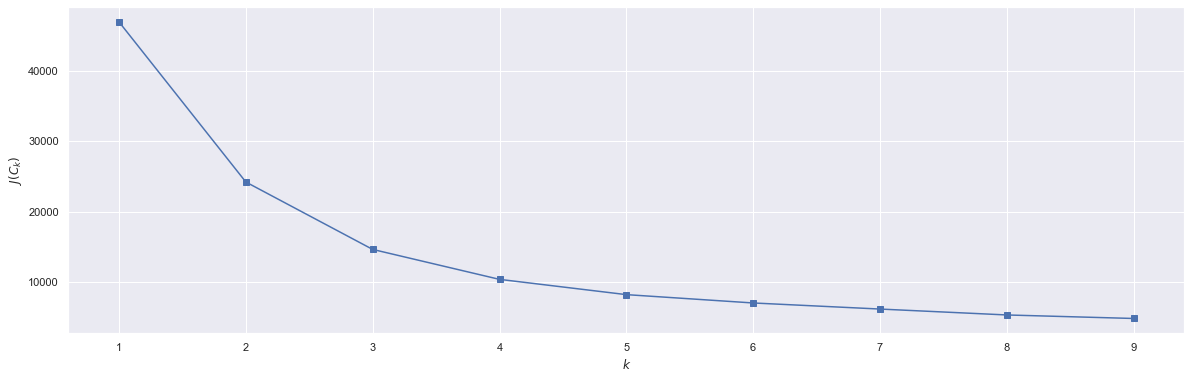

In [66]:
rcParams['figure.figsize'] = 20, 6
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(Данные_о_местоположение[['latitude', 'longitude', 'place_id']])
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state = 0)
kmeans.fit(Данные_о_местоположение[['latitude', 'longitude', 'place_id']])
y_kmeans = kmeans.predict(Данные_о_местоположение[['latitude', 'longitude', 'place_id']])

In [68]:
Данные_о_местоположение['y_kmeans'] = y_kmeans

<ipython-input-68-51040e0fbf14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Данные_о_местоположение['y_kmeans'] = y_kmeans


In [69]:
Данные_о_местоположение_PT = pd.pivot_table(Данные_о_местоположение, 
                             values=['client_id', 'price'],       
                             index=['y_kmeans',], aggfunc={'client_id' : 'nunique', 'price' : 'sum'})

In [70]:
Данные_о_местоположение_PT['СЧ'] = Данные_о_местоположение_PT['price'] / Данные_о_местоположение_PT['client_id']

In [71]:
Данные_о_местоположение_PT['y_kmeans_c'] = Данные_о_местоположение_PT.index

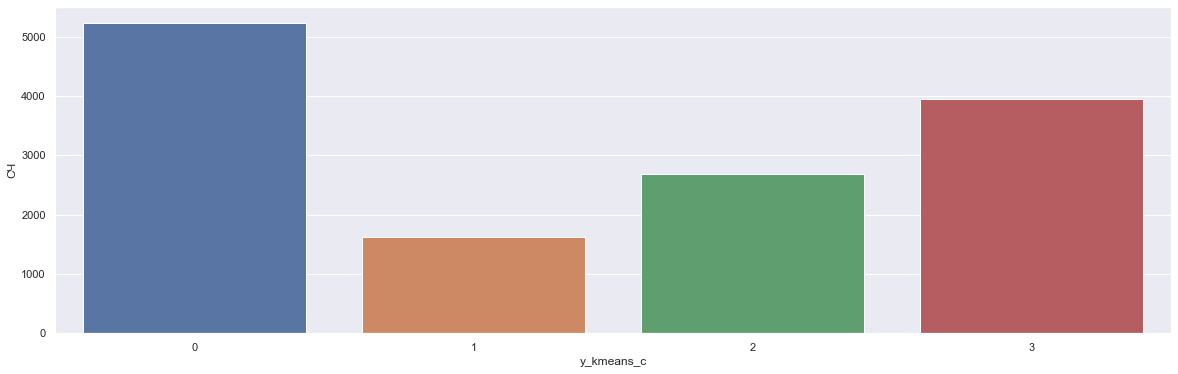

In [72]:
rcParams['figure.figsize'] = 20, 6
sns.barplot(x='y_kmeans_c', y='СЧ', data=Данные_о_местоположение_PT);

# Кластеризация дала неплохой результат. Место заказа (координаты) сильно влияют на средний чек заказа.
# Для "богатых" районов можно осуществлять допродажи более дорогих / качественных продуктов, допуслуги/сервисы. 
# Предложение статусов VIP итд.

In [73]:
Данные_о_местоположение

,id,latitude,longitude,price,place_id,client_id,y_kmeans
0,3b182b55-2816-418b-930f-eb30a7e0bee5,45.117107,39.037530,1459.0,0,bad3d57d-4760-43e3-891f-c6f6fb123499,0
1,8faeffb3-28b9-4a99-bbd9-8a94128c1b16,45.040642,38.981243,370.0,1,f2eaebdf-7878-463a-91b9-20616fdcd4cf,0
2,cccccce8-e75c-4ab3-892d-182ebb0f5776,45.037470,38.946109,860.0,1,f6ef3117-23fb-4a89-93d6-6a13092c27f6,0
3,997cb653-ef4c-4c4b-b251-308b66ad2aa0,45.055747,38.998247,2860.0,1,bd8a7330-289c-4fc1-b8f9-0f4700bdc26d,0
4,70b630d5-c93e-4adf-9db0-01a90ccbae50,45.125139,39.012207,350.0,1,e73e2099-ae9a-43f4-9c7c-31e005d59ad5,0
...,...,...,...,...,...,...,...
114396,575d8044-c858-4c56-a733-26c3000a9947,45.020341,38.960823,570.0,25,cb3ffcd7-29a3-4ea7-9cc9-3af707638411,0
114397,308f4e71-acc1-472f-b537-a08fd2f815b0,45.017557,39.052379,950.0,82,302802b6-e7cc-4f87-8798-7be8b16df83b,3
114398,325cc760-2a43-485c-9dbb-9816c385e005,45.064164,39.042184,1005.0,181,910c43dd-a992-49ae-bb50-2550c72d4e59,2
114399,068bf7e5-e256-4b85-8b49-9b036bfa2e9c,45.035744,39.015540,950.0,82,302802b6-e7cc-4f87-8798-7be8b16df83b,3


In [74]:
Данные_о_местоположение = Данные_о_местоположение[['id', 'y_kmeans']]

In [75]:
# Добавим кластера в общие данные
df = pd.merge(how='inner', left=df, right=Данные_о_местоположение, left_on='id', right_on='id')

# 6. Отказы

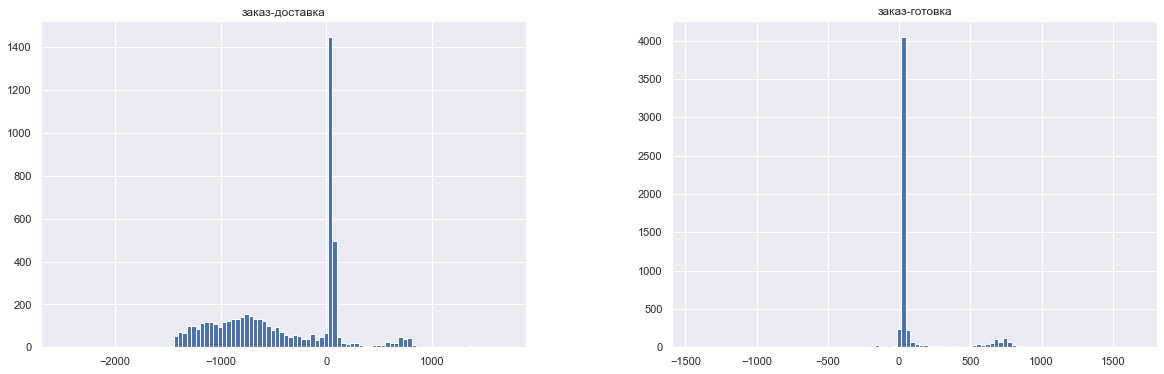

In [76]:
rcParams['figure.figsize'] = 20, 6
df[df['state'] != 'finished'][['заказ-доставка', 'заказ-готовка']].hist(bins = 100);

# Распределение времени от заказа до доставки имеет значение как в положительную, так и в отрицательную сторону, что странно.
# Есть группа заказов с временем приготовления от 500 до 1000 минут, что может вызывать вопросы. 

<AxesSubplot:>

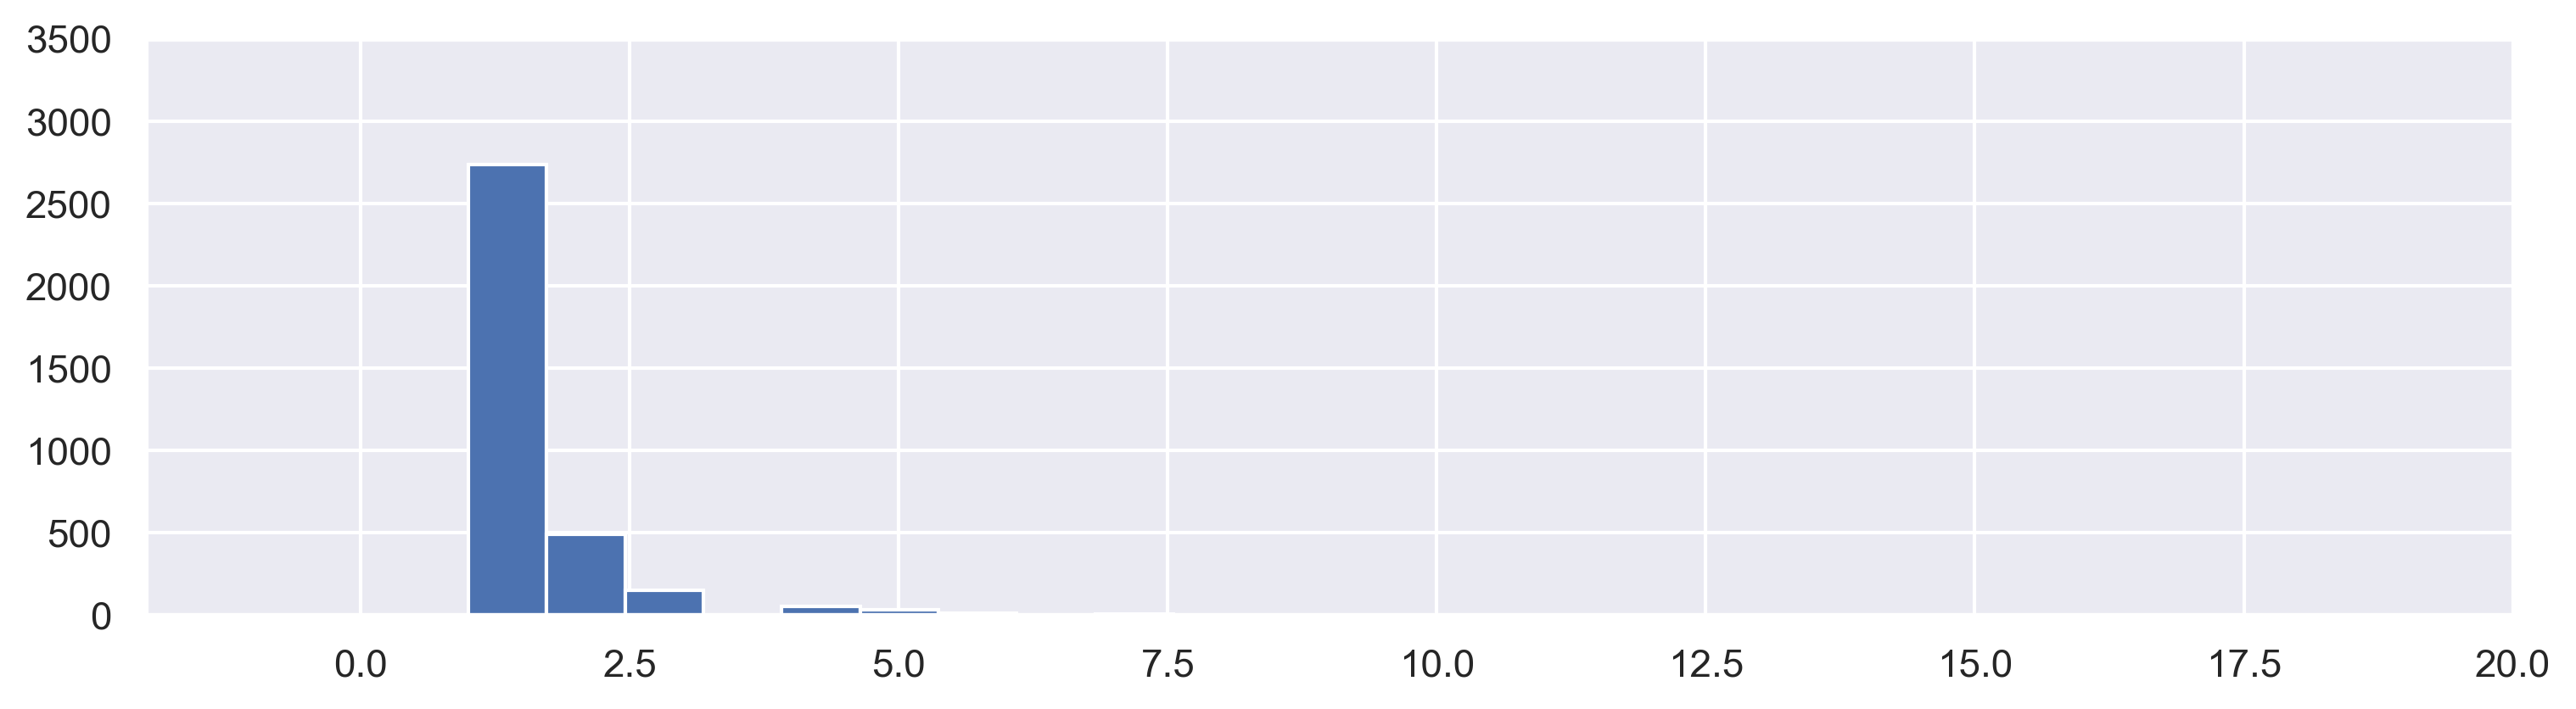

In [77]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)
axes.set_ylim([0, 3500])
axes.set_xlim([-2, 20])
df[df['state'] != 'finished'].groupby('client_id').count()['id'].hist(bins = 500)

# Есть клиенты, у которых срывается заказ несколько раз. Может их банить?

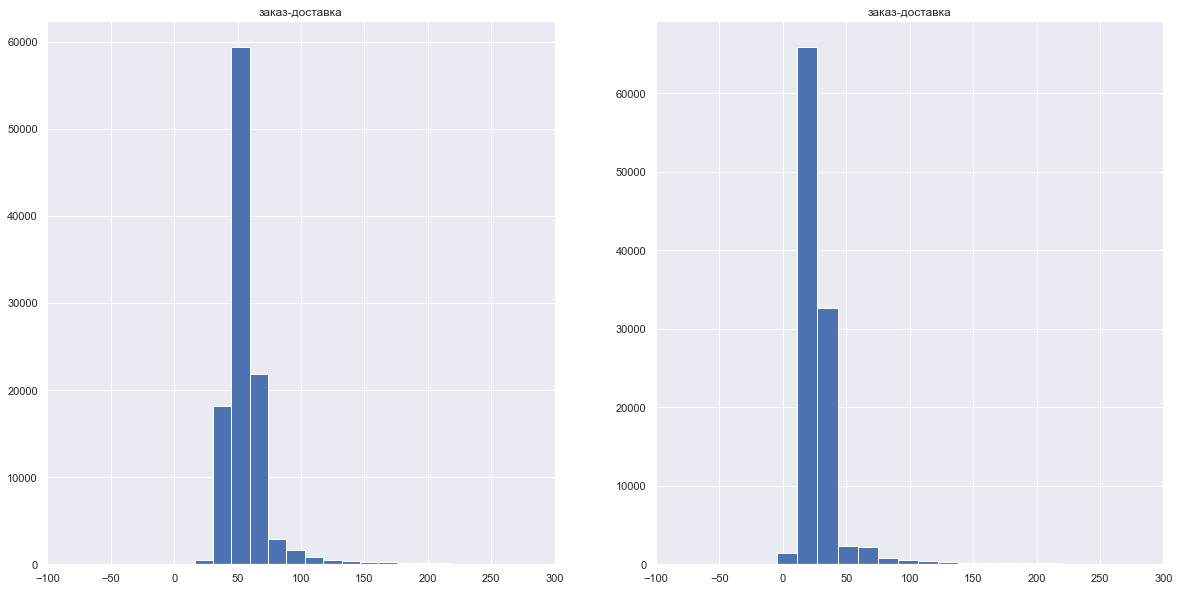

In [78]:
fig, axes = plt.subplots(1,2, figsize=(20, 10))

axes[0].hist(df[(df['state'] == 'finished')][['заказ-доставка']], bins = 1000)

axes[0].set_xlim([-100, 300])
axes[0].set_title("заказ-доставка");

axes[1].hist(df[(df['state'] == 'finished')][['заказ-готовка']], bins = 1000)

axes[1].set_xlim([-100, 300])
axes[1].set_title("заказ-доставка");

# В отличие от отмененных заказов распределение времени в завершенных заказах выглядит куда красивее и похоже на правду.
# Следовательно, причиной заказа может служить задержка во времени. Отрицательное время в отмененных заказах может появиться в следствии отмены заказа по инициативе покупателя. 
# ... В таком случае в систему специально вноситься время в данном формате 

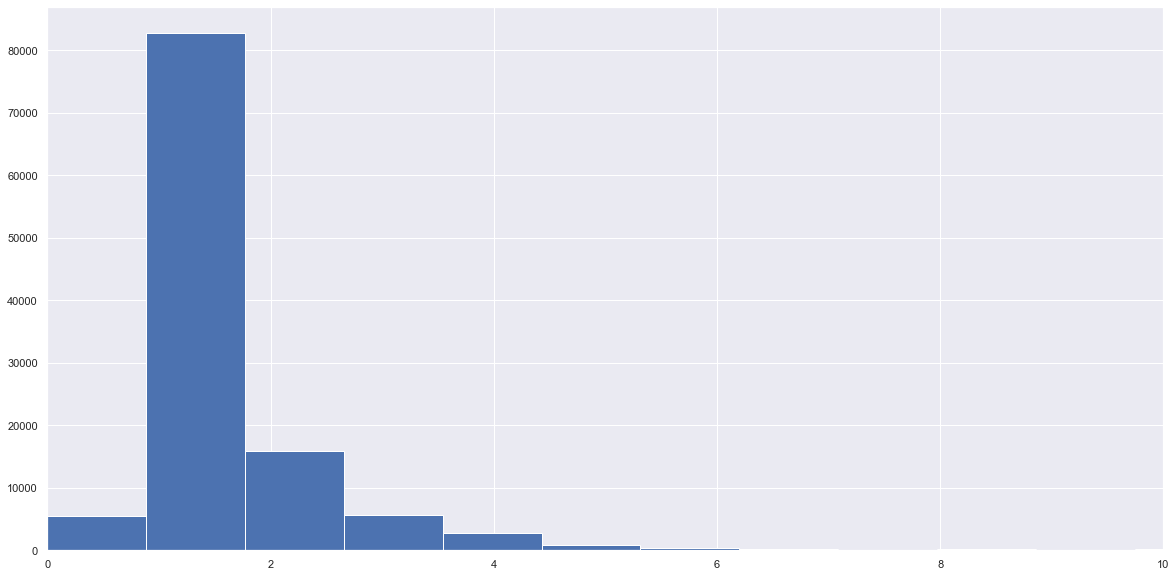

In [79]:
fig, axes = plt.subplots( figsize=(20, 10))
axes.set_xlim([0, 10])
axes.hist(df['user_count'], bins = 700);

# Распределение метрики user_count. На сколько я понял, это количество персон на которых осуществляется заказ.
# Если мое предположение верно, тогда стоит использовать это как точку роста, а именно предлагать заказывать на несколько персон.
# Акции формата 1+1, скидка за заказ свыше Х рублей.

In [80]:
Отказы  = pd.pivot_table(df, 
                         values=['client_id'], 
                         columns = 'state',
                         index=['place_id'], aggfunc='count')

In [81]:
Отказы.fillna(0, inplace=True)
Отказы['Заказ_не_произведен'] = Отказы[('client_id','canceled')] + Отказы[('client_id','canceled_bb')] + Отказы[('client_id','canceled_place')]
Отказы['Коэфицент_отказа'] = Отказы['Заказ_не_произведен'] / Отказы[('client_id','finished')]
Отказы = Отказы.replace([-np.inf, np.inf], [100, 100])

<AxesSubplot:>

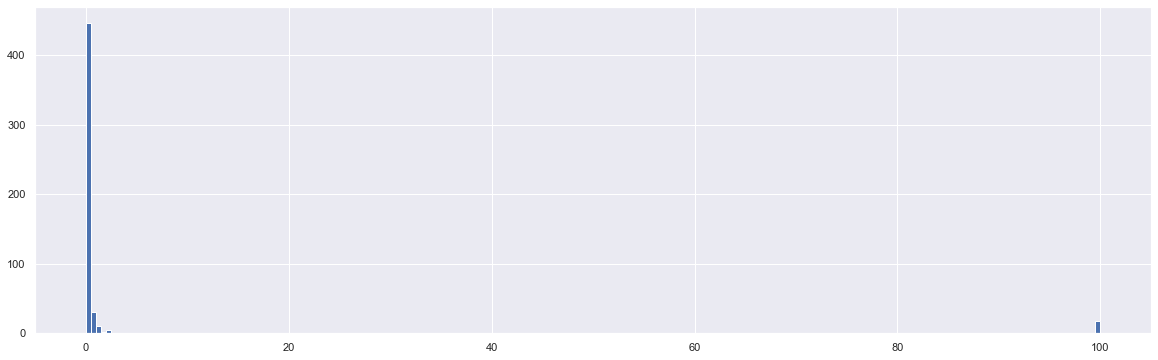

In [82]:
Отказы['Коэфицент_отказа'].hist(bins = 200)

# Некоторые места генерируют отказов в значительной степени больше чем в других. Так же есть места со 100% отказами, которые повторяется многократно.
# Для таких мест имеет смысл сразу брать предоплату